### LSE Data Analytics


## NHS Service Capacity and Sentiment Overview: Diagnostic Analysis using Python

### Background and Context
The NHS is looking to optimise its resources in terms of staff capacity and appointment attendance. Its focus is on analysing the cost of missed appointments to better allocate resources. The analysis focuses on answering the following questions:<br>
●	Has there been adequate staff capacity in the networks?<br>
●	What was the actual utilisation of resources?


The dataset provided included the following four datasets and their relative metadata:

●	**actual_duration.csv** (imported as **ad**): provides the date, location, duration, and counts of appointments.

> o	Location can be linked to examine the busiest locations. <br>
> o	Date helps visualise and analyse trends over time.<br>
> o	Count of appointments contextualises capacity.


●	**appointments_regional.csv** (imported as **ar**): provides date, location, appointment status, appointment mode, healthcare professional, the time between booking an appointment, and the count of appointments.

> o	Status helps explore attendance levels.<br>
> o	Mode looks at the type of appointment (ie. ‘Face-to-Face, ‘Telephone’, etc).<br>
> o	Healthcare professionals look at staff capacity and use.<br>
> o	Time between booking and appointment helps investigate reasons for missed appointments.

●	**national_categories.xlsx** (imported as **nc**): provides date, location, count of appointments, national categories, context type, and service setting.

> o	National category frames the reason for the appointment (ie. routine, surgery (planned or unplanned), etc).<br>
> o	Service setting refers to a type of facility/location.

●	**tweets.csv** (imported as **tweet**): provides NHS-related tweets to give a sentiment review over the topic.


### Data Exploration Phase:
- Import the three indicated data sources and perform basic exploratory analysis, including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import openpyxl
import warnings
warnings.filterwarnings('ignore')

C:\Users\benev\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
print(ad.shape)

print(ad.columns)

print(ad.dtypes)

ad.head()

(137793, 8)
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [3]:
# Check for missing values.
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

There are no missing values so we proceed with exploring the data more.

In [4]:
# Review metadata and descriptive statistics.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


In [6]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
print(ar.shape)

print(ar.columns)

print(ar.dtypes)

ar.head()

(596821, 7)
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [7]:
# Check for missing values.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

There are no missing values so we proceed with exploring the data more.

In [8]:
# Review metadata and descriptive statistics.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [9]:
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [10]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx', engine='openpyxl')

# View the DataFrame.
print(nc.shape)

print(nc.columns)

print(nc.dtypes)

nc.head()

(817394, 8)
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [11]:
# Check for missing values.
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

There are no missing values so we proceed with exploring the data more.

In [12]:
# Review metadata and descriptive statistics.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [13]:
nc.describe()

,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


##### How many locations are there in the data set?

In [14]:
# Determine the number of locations.
count_loc = nc['sub_icb_location_name'].value_counts()

print("The count of locations: ", count_loc.count())

# Adding empty print function to generate a cleaner output
print( )

print("The locations are:\n", nc['sub_icb_location_name'].unique())

The count of locations:  106

The locations are:
 ['NHS North East and North Cumbria ICB - 00L'
 'NHS North East and North Cumbria ICB - 00N'
 'NHS North East and North Cumbria ICB - 00P'
 'NHS Lancashire and South Cumbria ICB - 00Q'
 'NHS Lancashire and South Cumbria ICB - 00R'
 'NHS Greater Manchester ICB - 00T' 'NHS Greater Manchester ICB - 00V'
 'NHS Lancashire and South Cumbria ICB - 00X'
 'NHS Greater Manchester ICB - 00Y'
 'NHS Lancashire and South Cumbria ICB - 01A'
 'NHS Greater Manchester ICB - 01D'
 'NHS Lancashire and South Cumbria ICB - 01E'
 'NHS Cheshire and Merseyside ICB - 01F'
 'NHS Greater Manchester ICB - 01G'
 'NHS North East and North Cumbria ICB - 01H'
 'NHS Cheshire and Merseyside ICB - 01J'
 'NHS Lancashire and South Cumbria ICB - 01K'
 'NHS Cheshire and Merseyside ICB - 01T'
 'NHS Cheshire and Merseyside ICB - 01V'
 'NHS Greater Manchester ICB - 01W'
 'NHS Cheshire and Merseyside ICB - 01X'
 'NHS Greater Manchester ICB - 01Y' 'NHS Greater Manchester ICB - 02A'

##### What are the five locations with the highest number of records?


In [15]:
# Determine the top five locations based on record count.
top_locations = nc['sub_icb_location_name'].value_counts().head(5)

print('The top five locations based on records are: ')
print(top_locations.to_string(header=False))

The top five locations based on records are: 
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837


##### How many service settings, context types, national categories, and appointment statuses are there?

In [16]:
# Determine the number of service settings.
ser_set = nc['service_setting'].value_counts()

print('The number of service settings is: ', ser_set.count())
print( )
print('The service settings are: ')
print(ser_set.to_string(header=False))

The number of service settings is:  5

The service settings are: 
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419


In [17]:
# Determine the number of context types.
cont_type = nc['context_type'].value_counts()

print('The number of context types is: ', cont_type.count())
print( )
print('The context types are: ')

print(cont_type.to_string(header=False))

The number of context types is:  3

The context types are: 
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419


In [18]:
# Determine the number of national categories.
number_cat = nc['national_category'].value_counts()

print('The number of national categories is: ', number_cat.count())
print( )
print('The national categories are:')

print(number_cat.to_string(header=False))

The number of national categories is:  18

The national categories are:
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care

- Highest category being 'Inconsistent Mapping' already shows areas of improvement for future analysis.

In [19]:
# Determine the number of appointment statuses.
ap_status = ar['appointment_status'].value_counts()

print('The number of appointment statuses is: ', ap_status.count())
print( )
print('The category of appointment status is: ')

print(ap_status.to_string(header=False))

The number of appointment statuses is:  3

The category of appointment status is: 
Attended    232137
Unknown     201324
DNA         163360


- Almost a third of appointment statuses are actually unknown; another area for improvement in data collection.

In [20]:
# Summary of the previous questions.
print('In summary, there are %s service settings, %s context types, %s national categories, and %s number of appointment statuses.'
      % (ser_set.count(), cont_type.count(), number_cat.count(), ap_status.count()))

print( )

print(f"And the service settings are: ")

print(ser_set.to_string(header=False))

print( )

print(f"The context types are: ")
      
print(cont_type.to_string(header=False))

print( )

print(f"The national categories are:")

print(number_cat.to_string(header=False))

print( )

print(f"The appointment statuses are:")
      
print(ap_status.to_string(header=False))

In summary, there are 5 service settings, 3 context types, 18 national categories, and 3 number of appointment statuses.

And the service settings are: 
General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419

The context types are: 
Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419

The national categories are:
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                       

### Further Exploration:
- Answer more specific questions as well as additional trends identified during data exploration. 
> - Start by looking at the date range and the change in behaviour over time for the available data sources.

##### Between what dates were appointments scheduled? 

In [21]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad.dtypes)
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [22]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(nc.dtypes)

nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [23]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DataFrame.
print(ad.dtypes)
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [24]:
# Change the format of nc['appointment_date'] to datetime.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DataFrame.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [25]:
# Format ar['appointment_month']
# Fix the date column to be a valid date
ar['app_month'] = pd.DatetimeIndex(ar['appointment_month']).month

ar['app_year'] = pd.DatetimeIndex(ar['appointment_month']).year

# View dataframe and data types
print(ar.dtypes)
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
app_month                             int32
app_year                              int32
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,app_month,app_year
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,1,2020
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,1,2020
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,1,2020
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,1,2020
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,1,2020


In [26]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
min_ad = ad['appointment_date'].min()
max_ad = ad['appointment_date'].max()

print("The appointments data was collected from %s to %s " % (min_ad, max_ad))

The appointments data was collected from 2021-12-01 00:00:00 to 2022-06-30 00:00:00 


In [27]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
min_nc = nc['appointment_date'].min()
max_nc = nc['appointment_date'].max()

print("The appointments data was collected from %s to %s" % (min_nc, max_nc))

The appointments data was collected from 2021-08-01 00:00:00 to 2022-06-30 00:00:00


The min and max for the 'national category' and 'appointment duration' datasets show that the ranges of data collections are not the same length. Data from the 'national category' dataset start in August 2021, while the 'appointment duration' dataset starts in December 2021. The data range ends in June 2022 for both sets.

##### Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [28]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Creating subset for the location and time period.
nc_sub = nc.loc[nc['sub_icb_location_name'] =='NHS North West London ICB - W2U3Z']

nc_subset = nc_sub.loc[(nc['appointment_date'] >= '2022-01-01') & (nc['appointment_date'] <= '2022-06-01')]

# View the output.

nc_subset.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
800289,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Unmapped,Unmapped,Unmapped,496,2022-01
800290,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Clinical Triage,19,2022-01
800291,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Other,Inconsistent Mapping,Inconsistent Mapping,1,2022-01
800292,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,General Practice,Inconsistent Mapping,Inconsistent Mapping,16,2022-01
800293,2022-01-01,E54000027,NHS North West London ICB - W2U3Z,Primary Care Network,Care Related Encounter,Planned Clinics,29,2022-01


In [29]:
# Determining the number of records for the service settings
service_set = nc_subset['service_setting'].value_counts()

print('The number of records for service settings for NHS North West London between 1 January 2022  and 1 June 2022 are:')

print(service_set.to_string(header=False))

The number of records for service settings for NHS North West London between 1 January 2022  and 1 June 2022 are:
General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152


General Practice is the most popular service setting for NHS North West London in the first half of 2022 with 2104 records.

##### Which month had the highest number of appointments?

In [30]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.
sum_app = nc.loc[:,['count_of_appointments']].groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month])\
          .sum().sort_values(by=['count_of_appointments'], ascending=False)
sum_app

count_of_appointments
appointment_date appointment_date                       
2021             11                             30405070
                 10                             30303834
2022             3                              29595038
2021             9                              28522501
2022             5                              27495508
                 6                              25828078
                 1                              25635474
                 2                              25355260
2021             12                             25140776
2022             4                              23913060
2021             8                              23852171

In [31]:
app_ad = ad.loc[:,['count_of_appointments']].groupby([ad['appointment_date'].dt.year, ad['appointment_date'].dt.month])\
          .sum().sort_values(by=['count_of_appointments'], ascending=False)
app_ad

count_of_appointments
appointment_date appointment_date                       
2022             3                              27170002
                 5                              25343941
                 6                              23715317
                 1                              23597196
                 2                              23351939
2021             12                             22853483
2022             4                              21948814

Based on the 'national category' dataset, the busiest month by sum of appointments is November 2021, while on the 'actual duration' dataset (which begins data collection from December 2021) the busiest month is March 2022.

##### What was the total number of records per month?

In [32]:
# Total number of records per month.
tot_rec = nc.loc[:,['appointment_month']]. \
          groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).\
          value_counts().sort_values(ascending=False)
tot_rec

appointment_date  appointment_date  appointment_month
2022              3                 2022-03              82822
2021              11                2021-11              77652
2022              5                 2022-05              77425
2021              9                 2021-09              74922
2022              6                 2022-06              74168
2021              10                2021-10              74078
                  12                2021-12              72651
2022              1                 2022-01              71896
                  2                 2022-02              71769
                  4                 2022-04              70012
2021              8                 2021-08              69999
Name: count, dtype: int64

March 2022 has the most counts of records with a total of 82822 while August 2021 shows the least amounts of records with a total of 69999.

In [33]:
# Checking for what type of appointment was the most not attended
missed_app = ar.loc[ar['appointment_status'] == 'DNA']

# Percentage of appointments mode that were not attended
missed_app['appointment_mode'].value_counts(normalize=True)*100

appointment_mode
Face-to-Face    32.915034
Telephone       30.421156
Unknown         14.559256
Home Visit      13.091332
Video/Online     9.013222
Name: proportion, dtype: float64

In [34]:
# Count of appointments mode that were not attended
missed_app['appointment_mode'].value_counts()

appointment_mode
Face-to-Face    53770
Telephone       49696
Unknown         23784
Home Visit      21386
Video/Online    14724
Name: count, dtype: int64

The most missed appointments were Face to Face, with 53770 total missed appointments and covering almost 33% (32.915) of the total missed appointments, while Video/Online were the least missed ones with 14724 missed appointments and being only the 9% (9.013) of the total missed appointments.

### Visual Exploration and Trends Patterns:

#### Step 1
- Visualising number of appointments per month for service settings, context types, and national categories.

In [35]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

In [36]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_ss = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['service_setting','appointment_month','count_of_appointments']]\
   .groupby(['service_setting','appointment_month'])\
   .sum()\
   .reset_index ()
# View the output.
nc_ss

,service_setting,appointment_month,count_of_appointments
0,Extended Access Provision,2021-08,160927
1,Extended Access Provision,2021-09,187906
2,Extended Access Provision,2021-10,209539
3,Extended Access Provision,2021-11,207577
4,Extended Access Provision,2021-12,173504
5,Extended Access Provision,2022-01,186375
6,Extended Access Provision,2022-02,196627
7,Extended Access Provision,2022-03,231905
8,Extended Access Provision,2022-04,192284
9,Extended Access Provision,2022-05,220511


**Service settings:**

<function matplotlib.pyplot.show(close=None, block=None)>

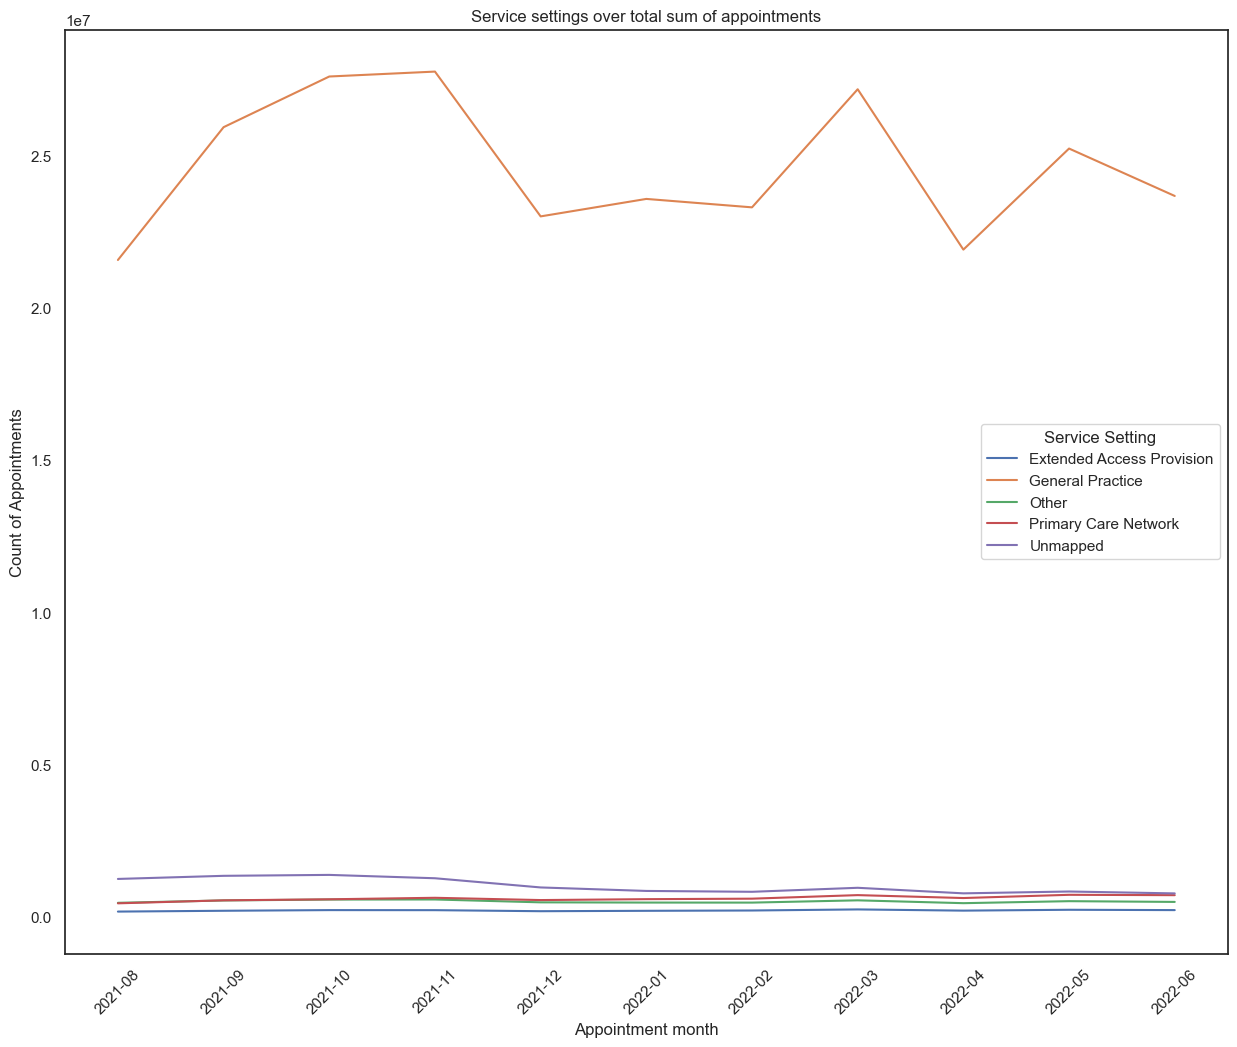

In [37]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, errorbar=None)
plt.title("Service settings over total sum of appointments")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment month")
plt.legend(title="Service Setting")
plt.xticks(rotation=45)
plt.show

**Context types:**

In [38]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_ct = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['context_type','appointment_month','count_of_appointments']]\
   .groupby(['context_type','appointment_month'])\
   .sum()\
   .reset_index ()
# View the output.
nc_ct

,context_type,appointment_month,count_of_appointments
0,Care Related Encounter,2021-08,20255235
1,Care Related Encounter,2021-09,24404251
2,Care Related Encounter,2021-10,26125201
3,Care Related Encounter,2021-11,26282778
4,Care Related Encounter,2021-12,21798612
5,Care Related Encounter,2022-01,22441947
6,Care Related Encounter,2022-02,22211021
7,Care Related Encounter,2022-03,25928850
8,Care Related Encounter,2022-04,20904193
9,Care Related Encounter,2022-05,24101243


<function matplotlib.pyplot.show(close=None, block=None)>

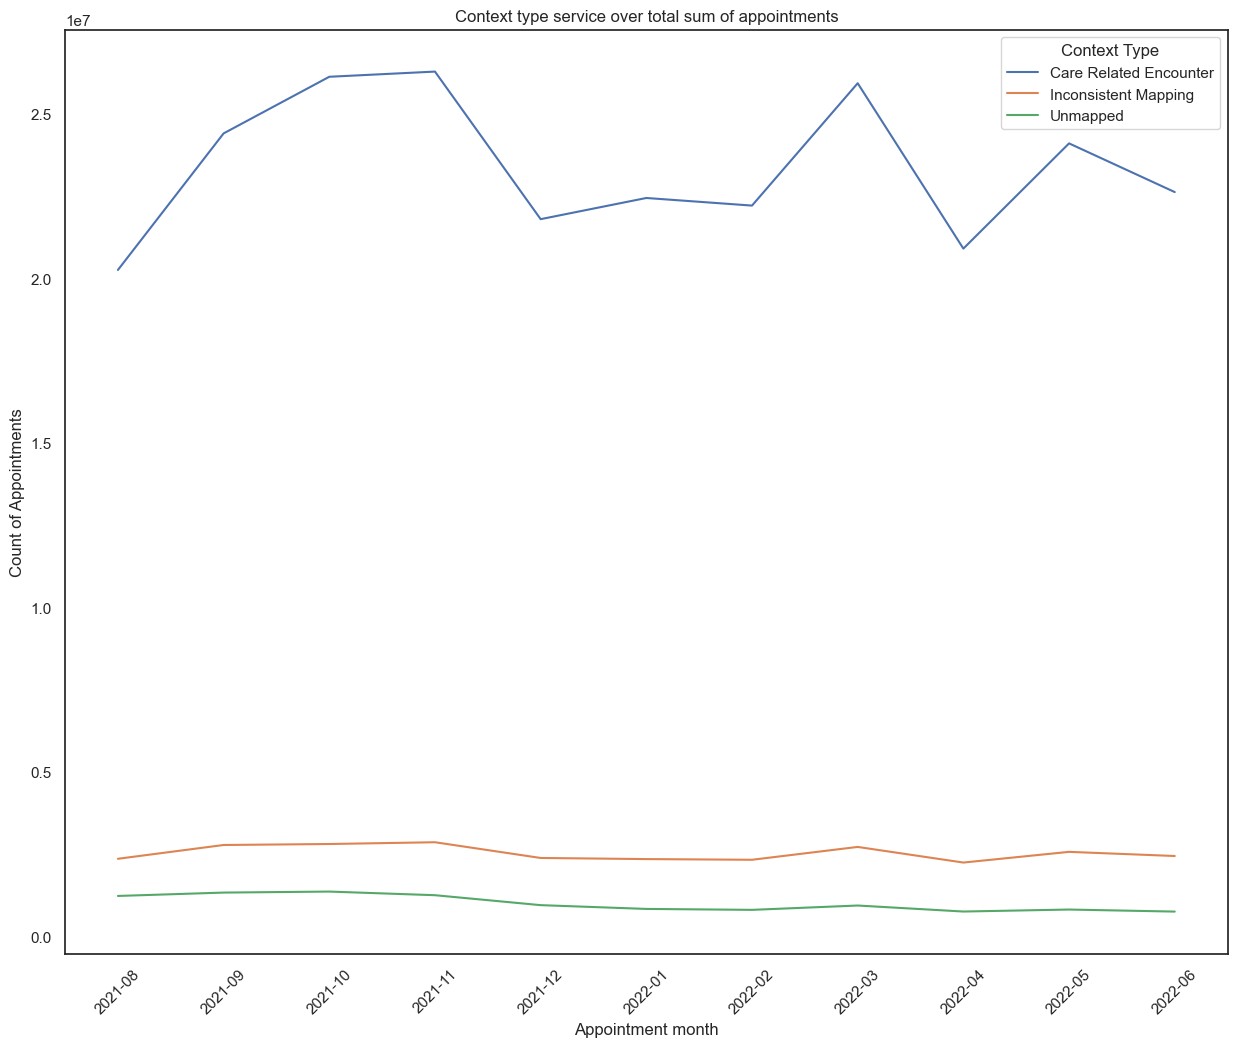

In [39]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct, errorbar=None)
plt.title("Context type service over total sum of appointments")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment month")
plt.legend(title="Context Type", loc="best")
plt.xticks(rotation=45)
plt.show

**National categories:**

In [40]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['national_category','appointment_month','count_of_appointments']]\
   .groupby(['national_category','appointment_month'])\
   .sum()\
   .reset_index ()

# View the output.
nc_nc

,national_category,appointment_month,count_of_appointments
0,Care Home Needs Assessment & Personalised Care...,2021-08,29676
1,Care Home Needs Assessment & Personalised Care...,2021-09,33503
2,Care Home Needs Assessment & Personalised Care...,2021-10,32441
3,Care Home Needs Assessment & Personalised Care...,2021-11,38827
4,Care Home Needs Assessment & Personalised Care...,2021-12,34653
...,...,...,...
193,Walk-in,2022-02,31665
194,Walk-in,2022-03,38070
195,Walk-in,2022-04,32346
196,Walk-in,2022-05,37687


<function matplotlib.pyplot.show(close=None, block=None)>

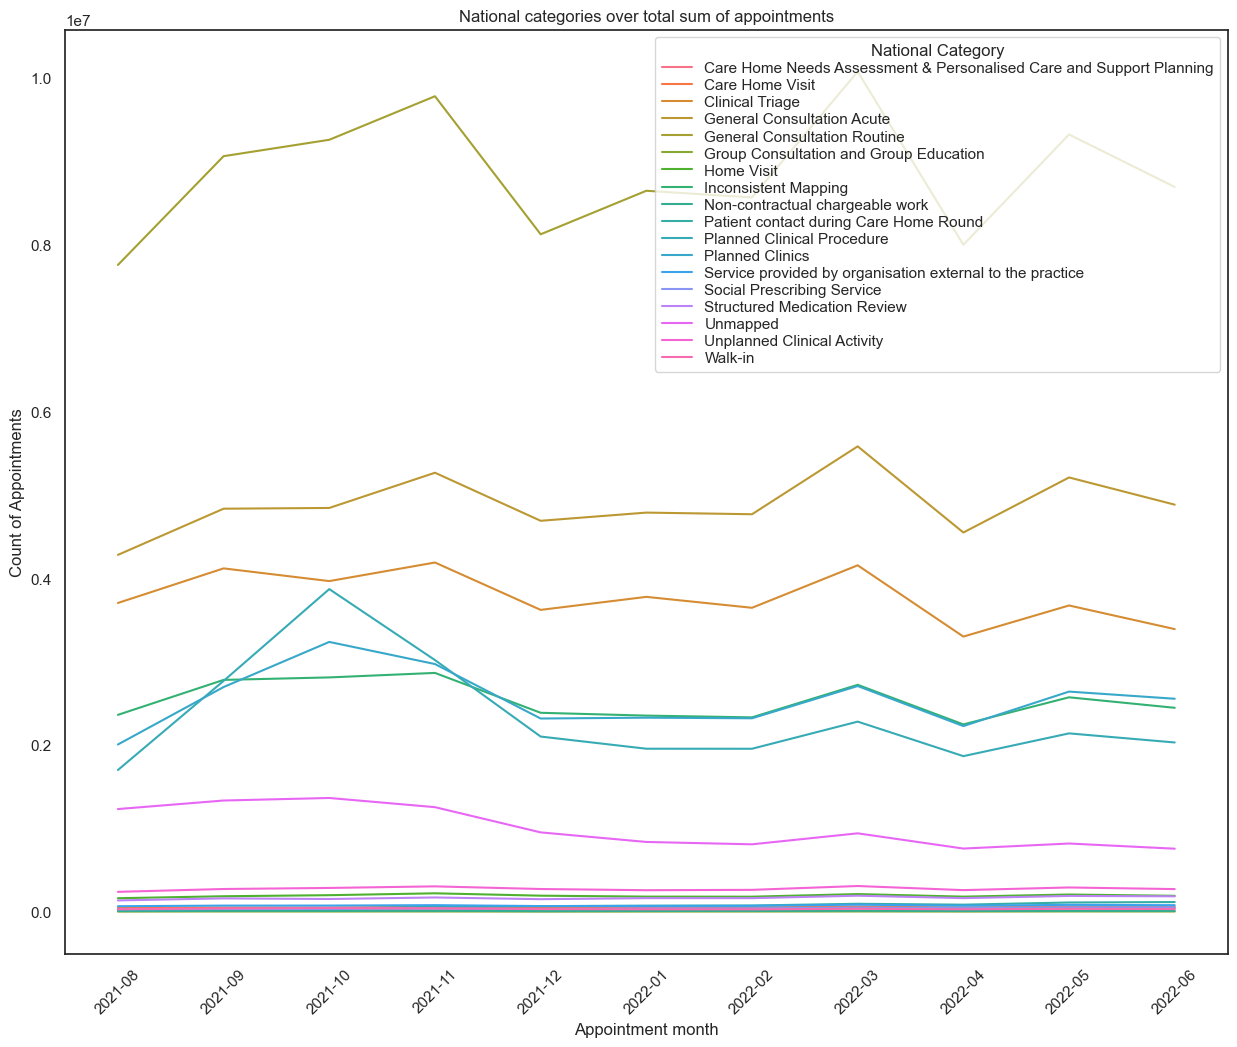

In [41]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc, errorbar=None)
plt.title("National categories over total sum of appointments")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment month")
plt.legend(title="National Category", labelspacing= 0.2)
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

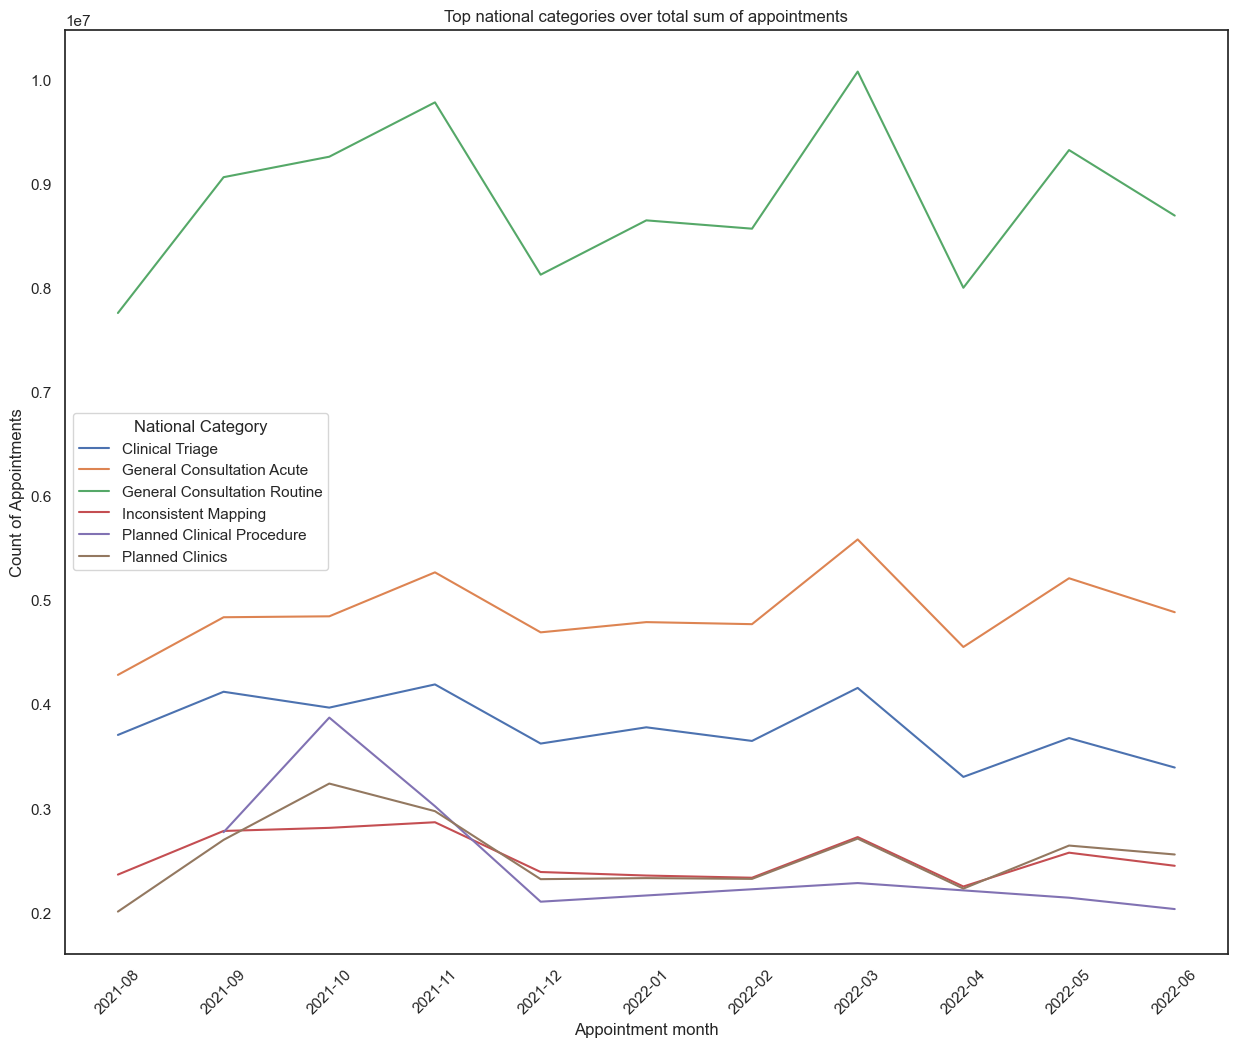

In [42]:
# Cleaning the lineplot.
# Reducing the legend size and overcrowding lines by filtering data.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', \
             data=nc_nc.loc[(nc_nc['count_of_appointments']>2000000)] , errorbar=None)
plt.title("Top national categories over total sum of appointments")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment month")
plt.legend(title="National Category", labelspacing= 0.5, loc="center left")
plt.xticks(rotation=45)
plt.show

#### Step 2:
- Visualising the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer:**


In [43]:
# Create a separate data set.
# Groupby date of appointment, monthly appointments and service settings
# Calculate sum and reset index
nc_ss_day = nc[['service_setting','appointment_date', 'count_of_appointments','appointment_month']].\
            groupby(['service_setting', 'appointment_date', 'appointment_month']).\
            sum('count_of_appointments').reset_index()
# View the output.
nc_ss_day


,service_setting,appointment_date,appointment_month,count_of_appointments
0,Extended Access Provision,2021-08-01,2021-08,438
1,Extended Access Provision,2021-08-02,2021-08,7705
2,Extended Access Provision,2021-08-03,2021-08,7820
3,Extended Access Provision,2021-08-04,2021-08,6917
4,Extended Access Provision,2021-08-05,2021-08,6841
...,...,...,...,...
1665,Unmapped,2022-06-26,2022-06,443
1666,Unmapped,2022-06-27,2022-06,40314
1667,Unmapped,2022-06-28,2022-06,37777
1668,Unmapped,2022-06-29,2022-06,35745


<function matplotlib.pyplot.show(close=None, block=None)>

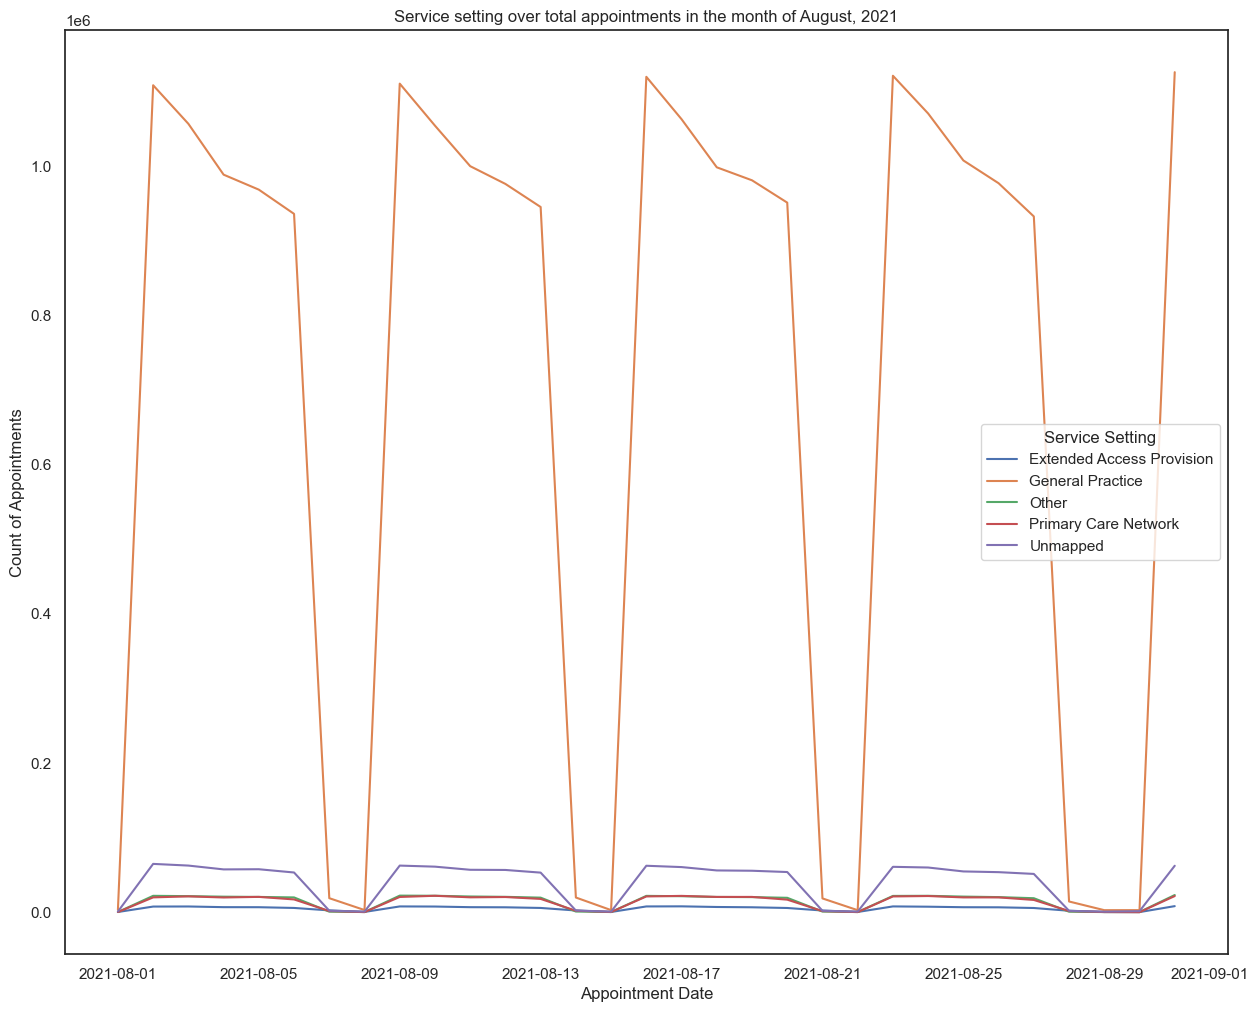

In [44]:
# Visualise the subset using a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments',hue='service_setting',\
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2021-08'], errorbar=None)
plt.title("Service setting over total appointments in the month of August, 2021")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment Date")
plt.legend(title="Service Setting", loc="best")
plt.show

**Autumn:**

<function matplotlib.pyplot.show(close=None, block=None)>

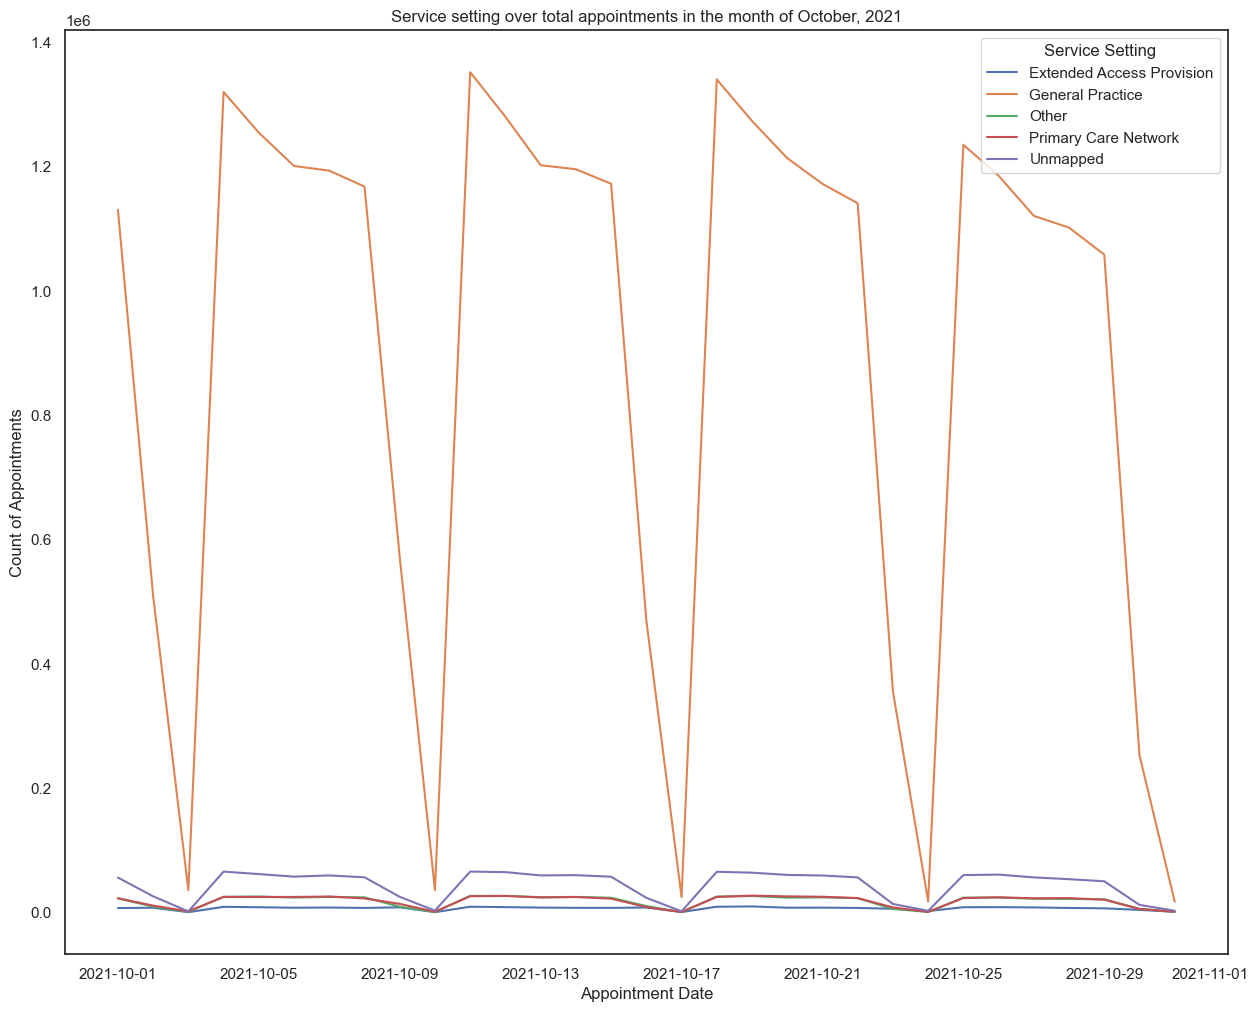

In [45]:
sns.lineplot(x='appointment_date', y='count_of_appointments',hue='service_setting',\
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2021-10'], errorbar=None)
plt.title("Service setting over total appointments in the month of October, 2021")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment Date")
plt.legend(title="Service Setting", loc="best")
plt.show

**Winter:**

<function matplotlib.pyplot.show(close=None, block=None)>

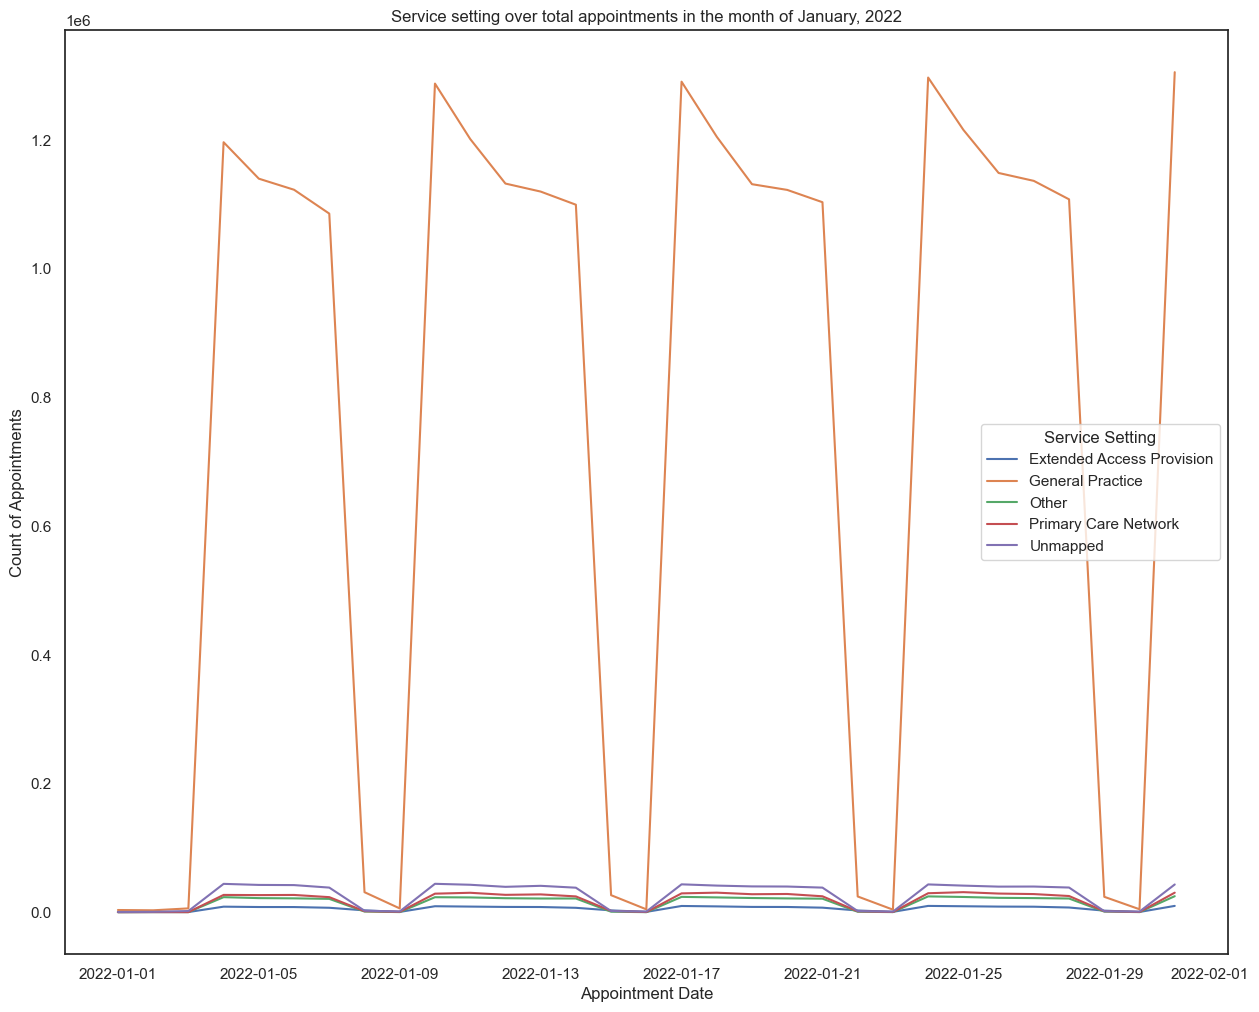

In [46]:
sns.lineplot(x='appointment_date', y='count_of_appointments',hue='service_setting',\
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2022-01'], errorbar=None)
plt.title("Service setting over total appointments in the month of January, 2022")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment Date")
plt.legend(title="Service Setting", loc="best")
plt.show

**Spring:**

<function matplotlib.pyplot.show(close=None, block=None)>

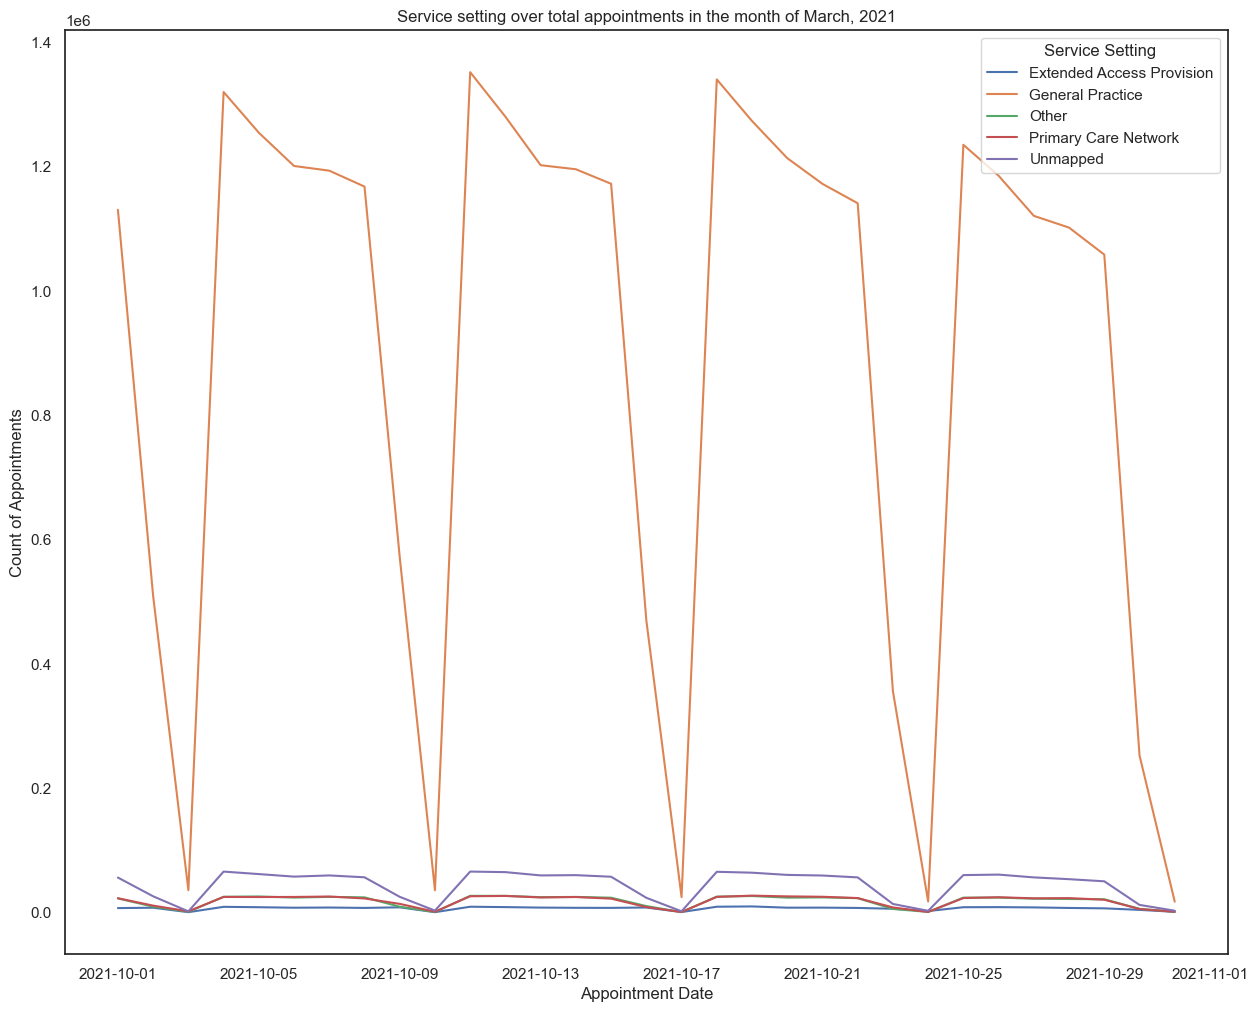

In [47]:
sns.lineplot(x='appointment_date', y='count_of_appointments',hue='service_setting',\
            data=nc_ss_day[nc_ss_day['appointment_month'] == '2021-10'], errorbar=None)
plt.title("Service setting over total appointments in the month of March, 2021")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment Date")
plt.legend(title="Service Setting", loc="best")
plt.show

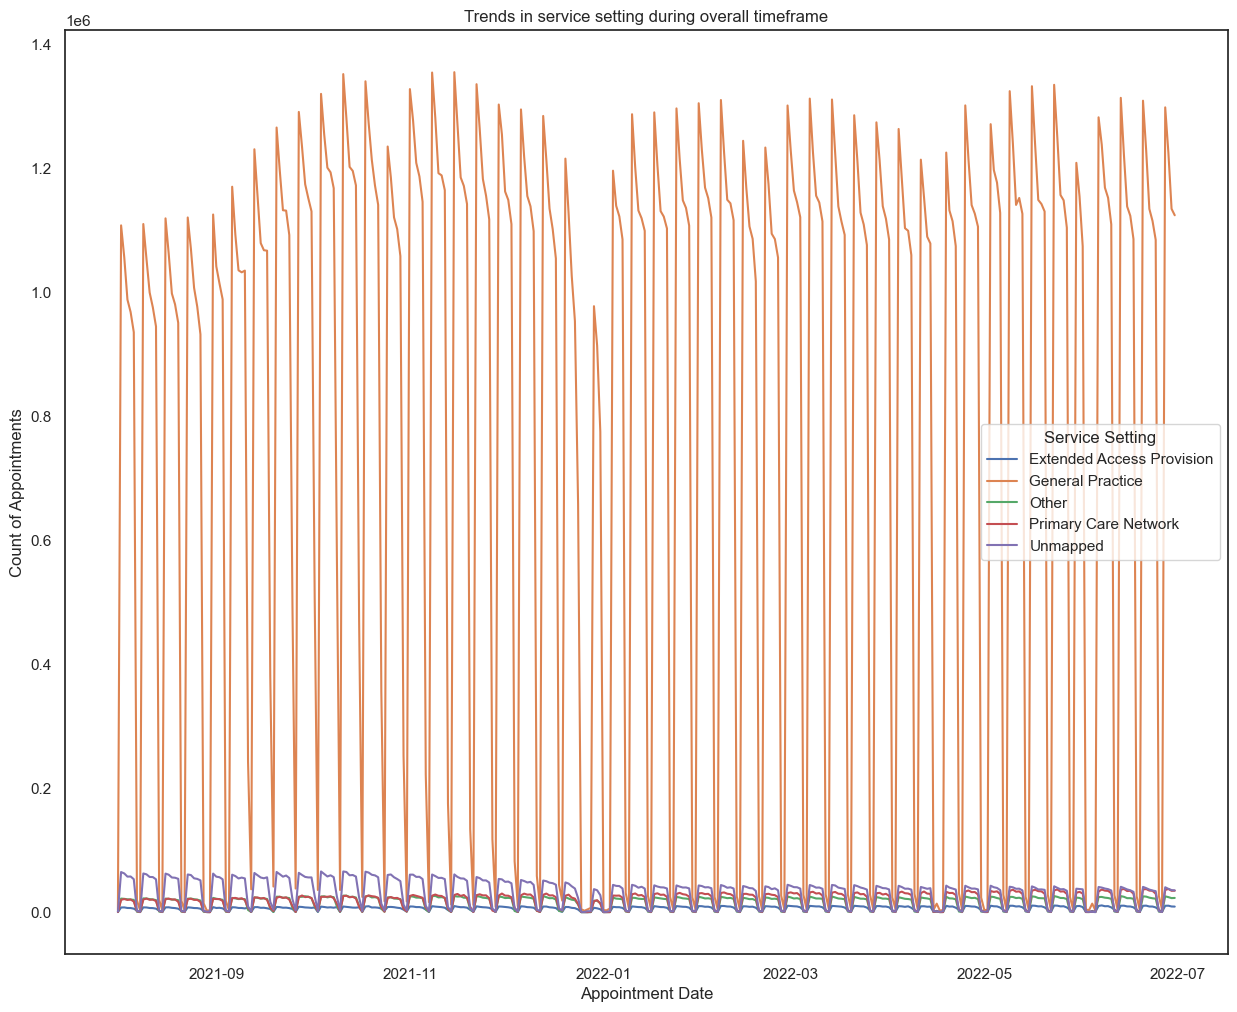

In [48]:
# Monthly service setting
sns.lineplot(x='appointment_date', y='count_of_appointments',hue='service_setting',\
            data=nc_ss_day, errorbar=None)
plt.title("Trends in service setting during overall timeframe")
plt.ylabel("Count of Appointments")
plt.xlabel("Appointment Date")
plt.legend(title="Service Setting", loc="best")

- Trends in the number of appointments during the week follow a consistent pattern with peaks at the beginning of the week and slowing down in the following days.

<function matplotlib.pyplot.show(close=None, block=None)>

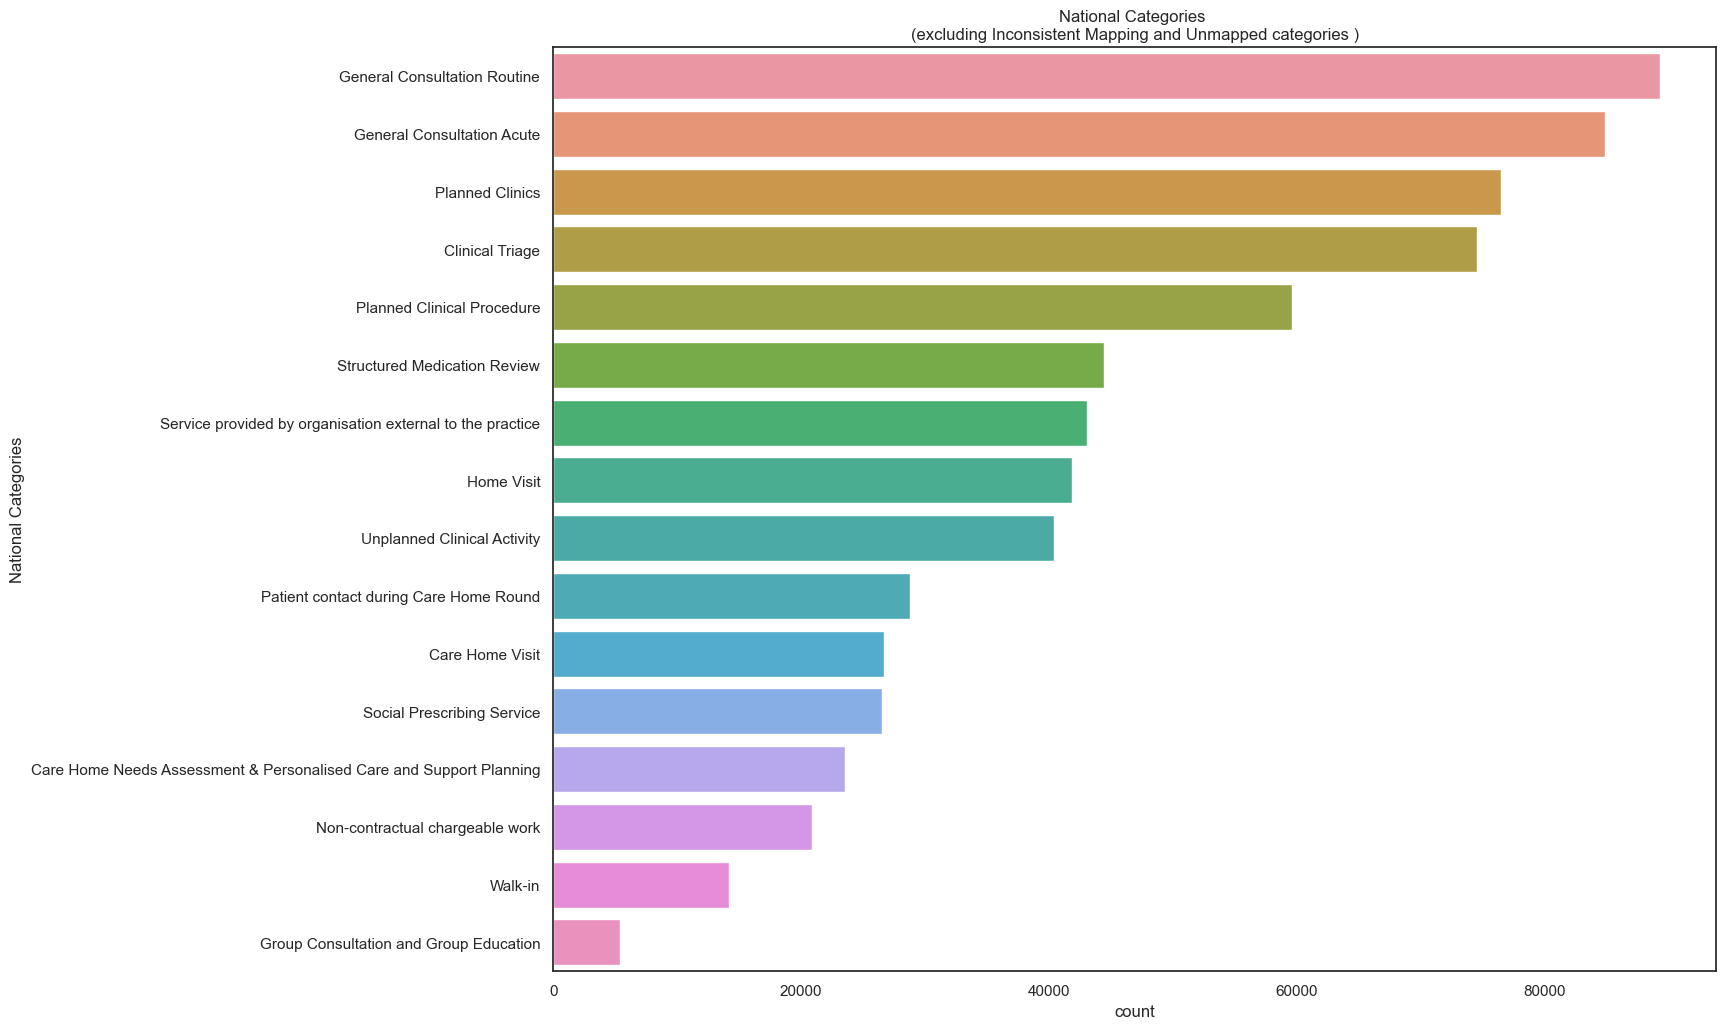

In [49]:
# Checking national categories overall excluding inconsistent mapping and unmapped
nc_nc_map = nc[~(nc['national_category'].str.contains('Inconsistent Mapping')| nc['national_category'].str.contains('Unmapped'))]

# Plotting data as a countplot
sns.countplot(data=nc_nc_map, y='national_category', order = nc_nc_map['national_category'].value_counts().index)
plt.title("National Categories \n(excluding Inconsistent Mapping and Unmapped categories )")
plt.ylabel("National Categories")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

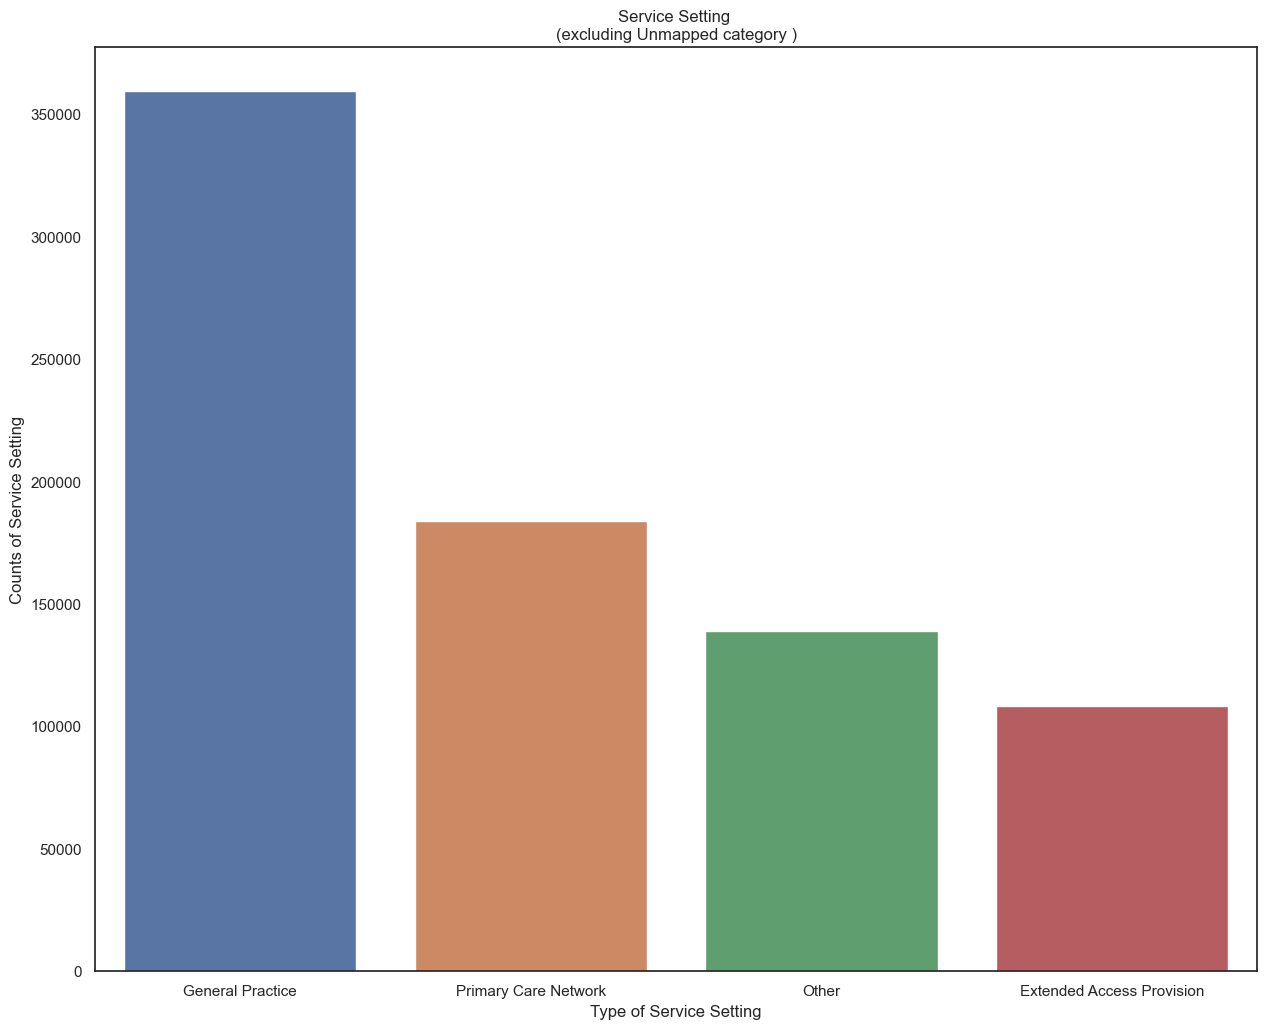

In [50]:
# Countplot for service setting excluding unmapped
nc_ss_map = nc[~(nc['service_setting'].str.contains('Unmapped'))]

sns.countplot(data=nc_ss_map, x='service_setting', order = nc_ss_map['service_setting'].value_counts().index)
plt.title("Service Setting \n(excluding Unmapped category )")
plt.ylabel("Counts of Service Setting")
plt.xlabel("Type of Service Setting")
plt.show

# 

### Sentiment Analysis:
- Analyse tweets with hashtags related to healthcare in the UK (from an already provided dataset).

In [51]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [52]:
# Load the data set.
tweets= pd.read_csv('tweets.csv')

# View the DataFrame.
tweets

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…,"{'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 'recent'}",1,0,False,False,en
1170,1567582945342267393,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...","{'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...","{'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices'

In [53]:
# Explore the metadata and data set.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [54]:
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


Looking at retweeted and favourite messages is a good way to start understanding the trending topics and issues. Examining the hashtags and recurring words also helps in getting a more complete look over the topic and the overall feeling from the public. 

In [55]:
# Explore the data set.
# Looking at the most retweeted tweets.
t_t = tweets.loc[:,['tweet_id','tweet_full_text','tweet_retweet_count','tweet_favorite_count']]\
    .groupby(['tweet_id'])\
    .sum()\
    .sort_values(by=['tweet_retweet_count'], ascending=False)
t_t.head(20)

,tweet_full_text,tweet_retweet_count,tweet_favorite_count
tweet_id,,,
1567649792897032192,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,303,0
1567594695890542592,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567585317498003456,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567594594547945472,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567588265414520832,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567583062354968576,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567621342987718656,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567587723850166272,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0
1567585759036669958,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",208,0


In [56]:
# Grouping by the tweet text to see the actual top retweeted tweets and their total count.
twt = tweets.loc[:,['tweet_full_text','tweet_retweet_count','tweet_favorite_count']]\
    .groupby(['tweet_full_text'])\
    .sum()\
    .sort_values(by=['tweet_retweet_count'], ascending=False)
twt.head(20)

,tweet_retweet_count,tweet_favorite_count
tweet_full_text,,
"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",3117,0
"RT @ricochet_en: Health care in Canada is collapsing. “We’re beyond the worst-case scenario.” Now, provincial governments are pushing priva…",801,0
RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…,600,0
RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…,365,0
RT @CURE_Ecosystem: EXCLUSIVE footage. Just for our supporters. Who wants a first look at the Car? 👀 VROOM. NASCAR.. here we come!!\n\n#RACE4…,315,0
RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,303,0
RT @JeffWaltersSask: A good read on what nurses are going through as our HC system in #saskatchewan crumbles. Time for the @PremierScottMoe…,257,0
"RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…",255,0
RT @healthcare_NFT_: The #HealthCare Heroes journey continues. Join the Discord to learn more! \n\nhttps://t.co/j5TPbll30o https://t.co/Zl9OV…,252,0


In [57]:
# Explore the data set. 
# Looking at the most 'favourite' tweets
f_t = tweets.loc[:,['tweet_id','tweet_full_text','tweet_retweet_count','tweet_favorite_count']]\
      .groupby(['tweet_id'])\
      .sum()\
      .sort_values(by=['tweet_favorite_count'], ascending=False)
f_t.head(20)

,tweet_full_text,tweet_retweet_count,tweet_favorite_count
tweet_id,,,
1567583855422611461,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,12,42
1567582427719282689,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,1,28
1567634936341069826,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,5,20
1567579049043832832,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...",4,18
1567586306607423488,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...",3,17
1567577266162475011,"More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...",4,14
1567611240024875008,Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...,3,13
1567587492949286912,@CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare services in SA must be paid by foreign nationals and loca...,0,12
1567643206480699392,September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors to #InvestInHer!\n\nI #InvestInHer to diversify the #healthcare #leadersh...,8,11


The above steps show that the most retweeted tweets are not the most favourited tweets and are mostly retweets themselves. The favourite tweets seems more personal in character than the retweeted ones and gather less retweets as they remain more on personal social networks.

In [58]:
# Create a new DataFrame containing only the text.
tweet_text = pd.DataFrame(tweets['tweet_full_text'])

# View the DataFrame.
tweet_text.head()

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [59]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

In [60]:
# Display the first 30 records.
tags[:30]

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare']

In [61]:
# Convert the series to a DataFrame in preparation for visualisation.
dt = pd.DataFrame(tags, columns=['word']).value_counts().reset_index(name='count')

# Clean new DataFrame and remove #
data = dt.drop_duplicates()
data['word'] = data['word'].str.replace('#','')

data.head(30)

,word,count
0,healthcare,716
1,health,80
2,medicine,41
3,ai,40
4,job,38
5,medical,35
6,strategy,30
7,pharmaceutical,28
8,digitalhealth,25
9,marketing,25


In [62]:
# Display records where the count is larger than 10.
data_10 = data[data['count'] >10]
data_10

,word,count
0,healthcare,716
1,health,80
2,medicine,41
3,ai,40
4,job,38
5,medical,35
6,strategy,30
7,pharmaceutical,28
8,digitalhealth,25
9,marketing,25


Text(0.5, 1.0, 'Trending hashtags related to healthcare')

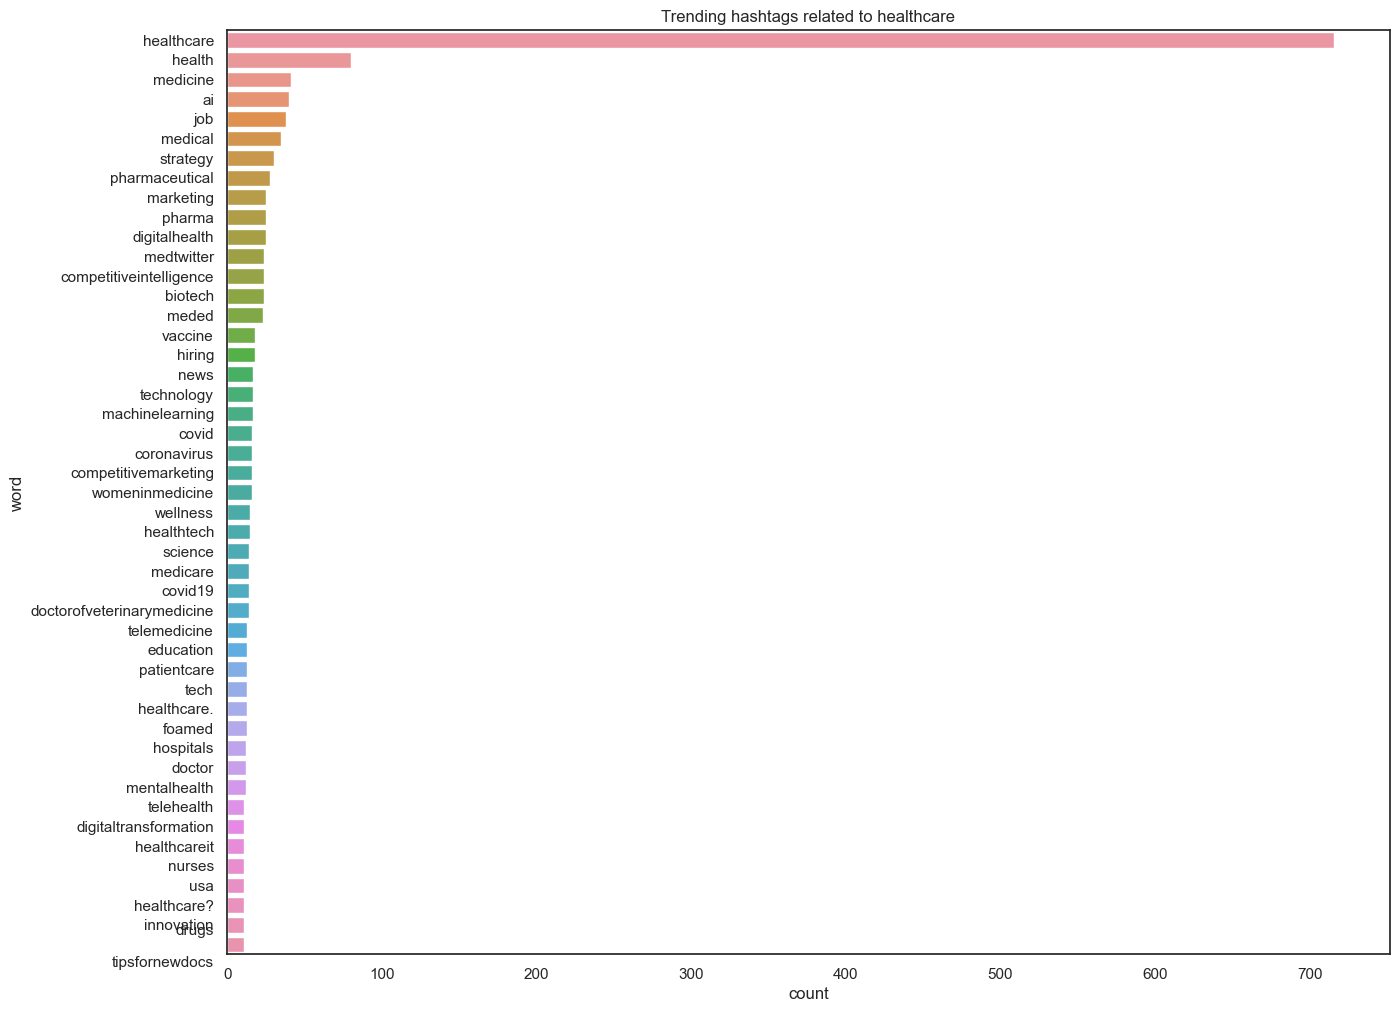

In [63]:
# Create a Seaborn barplot displaying records with a count larger than 10.
hash_chart = sns.barplot(data=data_10, y='word',x='count', order=data_10.sort_values('count',ascending = False).word)
hash_chart.set_title("Trending hashtags related to healthcare")

Text(0.5, 1.0, 'Top 25 Trending Hashtags related to Healthcare')

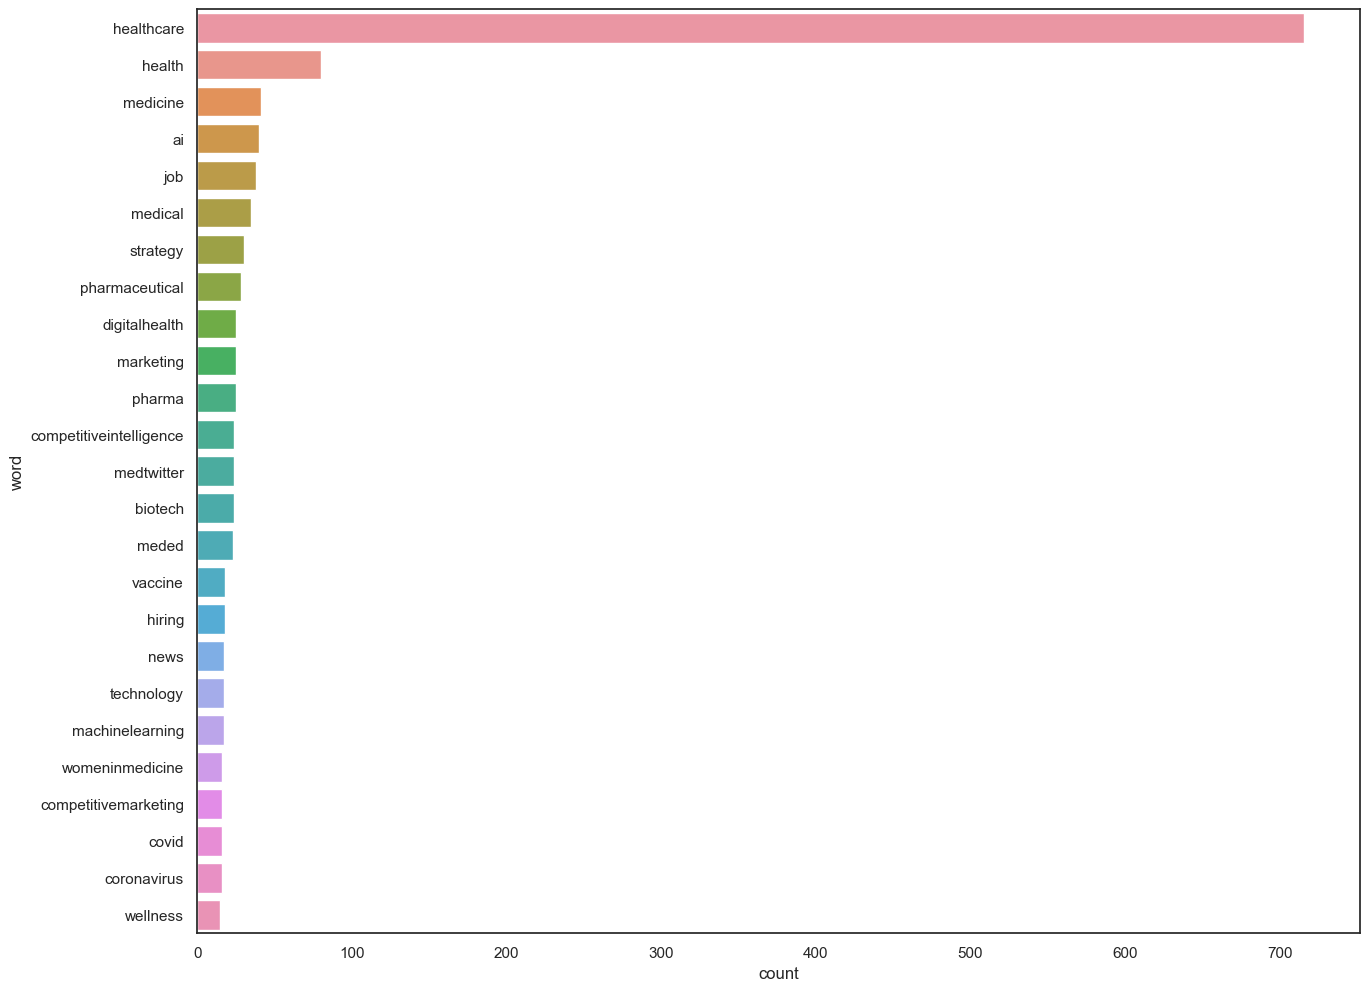

In [64]:
# Filtering the barplot to make it clearer
data_25 = data.head(25)
top_chart= sns.barplot(data=data_25,y='word',x='count',\
                       order=data_25.sort_values('count',ascending = False).word)
hash_chart.set_title("Top 25 Trending Hashtags related to Healthcare")

# 

### Explanatory Analysis:

- Investigating and addressing main concerns posed by the NHS.

In [65]:
# View the DataFrame.
ar

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,app_month,app_year
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,1,2020
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,1,2020
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,1,2020
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,1,2020
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,1,2020
...,...,...,...,...,...,...,...,...,...
596816,E54000050,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,21,6,2022
596817,E54000050,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,8,6,2022
596818,E54000050,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,28,6,2022
596819,E54000050,2022-06,Unknown,Unknown,Unknown,More than 28 Days,17,6,2022


In [66]:
# Print the min and max dates.
print(ar['appointment_month'].min())
print(ar['appointment_month'].max())

2020-01
2022-06


In [67]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_sub = ar[ar['appointment_month'] >= '2021-08']

print("The data in the set represents the period from {} to {}".format(ar_sub.appointment_month.min(),
                                                                       ar_sub.appointment_month.max()))

The data in the set represents the period from 2021-08 to 2022-06


##### Should the NHS start looking at increasing staff levels? 

In [68]:
# Create an aggregated data set to review the different features.
ar_ag = ar_sub.groupby(['appointment_month','hcp_type', 'appointment_status', 'appointment_mode',
                        'time_between_book_and_appointment'])\
              .sum('count_of_appointments').reset_index()
ar_ag = ar_ag.drop(columns=['app_month', 'app_year'])

ar_ag

,appointment_month,hcp_type,appointment_status,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2021-08,GP,Attended,Face-to-Face,1 Day,507835
1,2021-08,GP,Attended,Face-to-Face,15 to 21 Days,194726
2,2021-08,GP,Attended,Face-to-Face,2 to 7 Days,959486
3,2021-08,GP,Attended,Face-to-Face,22 to 28 Days,102111
4,2021-08,GP,Attended,Face-to-Face,8 to 14 Days,398772
...,...,...,...,...,...,...
3749,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
3750,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
3751,2022-06,Unknown,Unknown,Unknown,Same Day,1914
3752,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [69]:
# Determine the total number of appointments per month.
ar_app = ar_ag.groupby(['appointment_month']).sum('count_of_appointments').reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_app['utilisation'] = round(ar_app['count_of_appointments']/30, 1)

# View the DataFrame.
ar_app

,appointment_month,count_of_appointments,utilisation
0,2021-08,23852171,795072.4
1,2021-09,28522501,950750.0
2,2021-10,30303834,1010127.8
3,2021-11,30405070,1013502.3
4,2021-12,25140776,838025.9
5,2022-01,25635474,854515.8
6,2022-02,25355260,845175.3
7,2022-03,29595038,986501.3
8,2022-04,23913060,797102.0
9,2022-05,27495508,916516.9


In [70]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.
ar_app['appointment_month'] = ar_app['appointment_month'].values.astype('str')
ar_app.dtypes


appointment_month         object
count_of_appointments      int64
utilisation              float64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

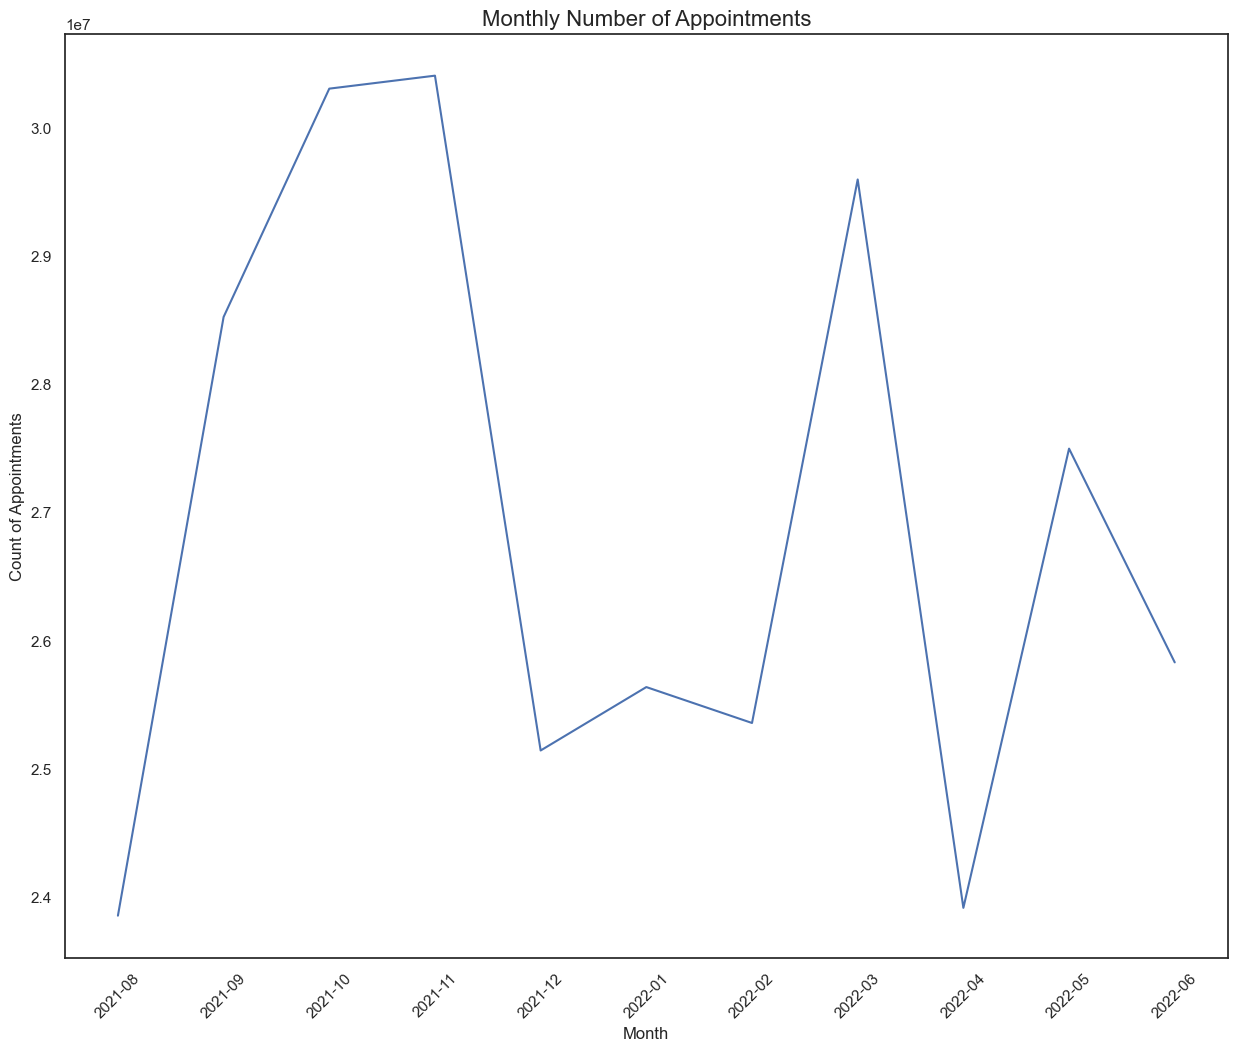

In [71]:
# Create a lineplot with Seaborn.
sns.lineplot(data=ar_app, x=ar_app['appointment_month'], y=ar_app['count_of_appointments'])
plt.title("Monthly Number of Appointments",fontsize=16)
plt.xlabel("Month")
plt.ylabel("Count of Appointments")
plt.xticks(rotation=45)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

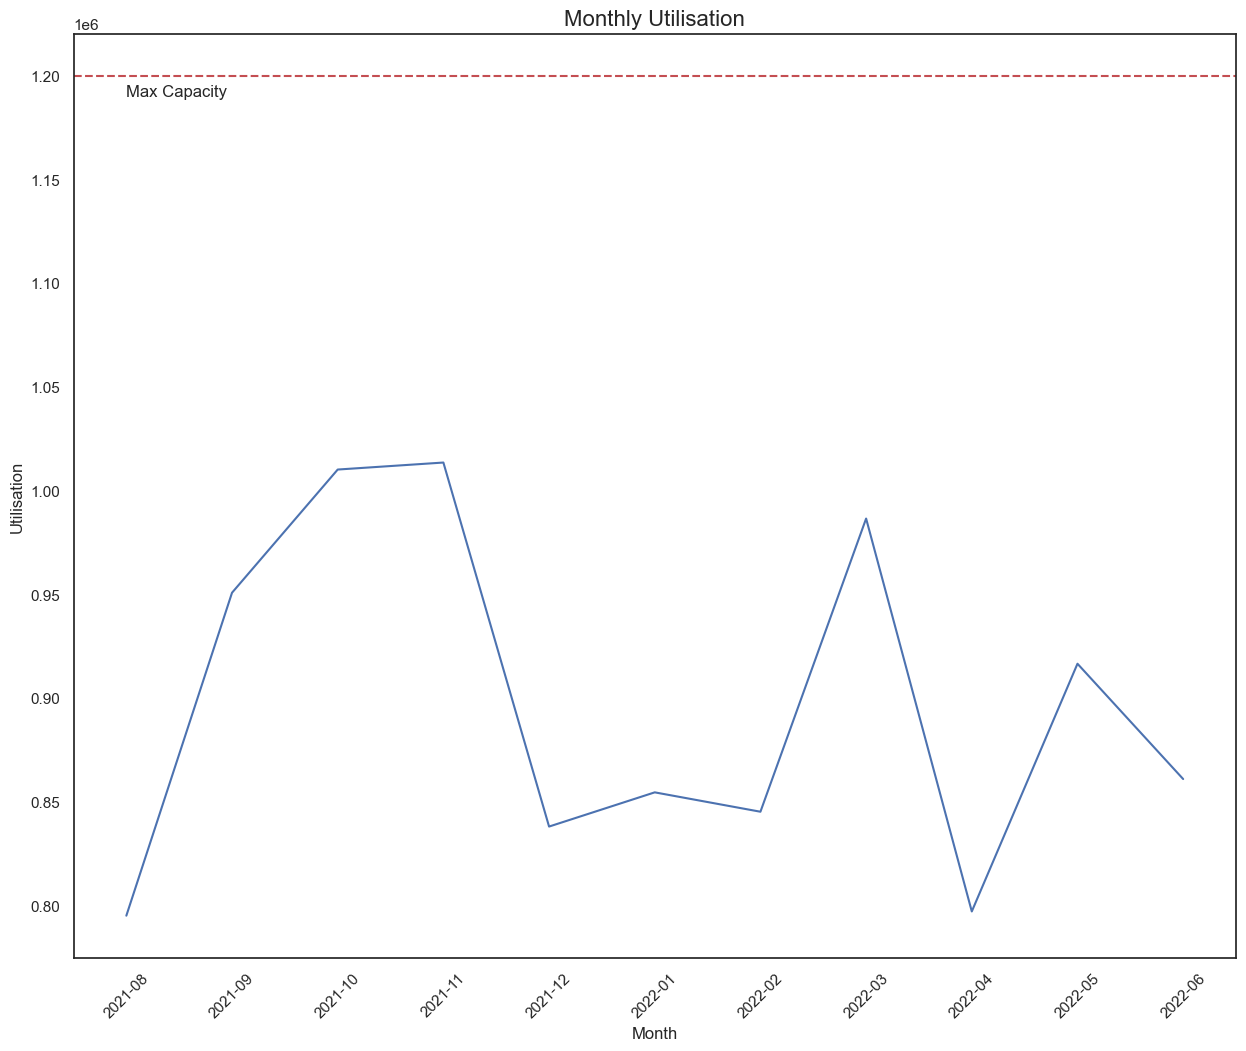

In [72]:
# Plot monthly capacity utilisation.
max_capacity = 1200000
labels = ar_app['utilisation'].tolist()

# Create a lineplot.
sns.lineplot(data=ar_app, x=ar_app['appointment_month'], y=ar_app['utilisation'])
plt.title("Monthly Utilisation",fontsize=16)
plt.xlabel("Month")
plt.ylabel("Utilisation")
plt.xticks(rotation=45)
plt.axhline(y=max_capacity, color='r', linestyle='--')
plt.text('2021-08',1190000, "Max Capacity")
plt.show

[Text(0, 0, '795072.4'),
 Text(0, 0, '950750.0'),
 Text(0, 0, '1010127.8'),
 Text(0, 0, '1013502.3'),
 Text(0, 0, '838025.9'),
 Text(0, 0, '854515.8'),
 Text(0, 0, '845175.3'),
 Text(0, 0, '986501.3'),
 Text(0, 0, '797102.0'),
 Text(0, 0, '916516.9'),
 Text(0, 0, '860935.9')]

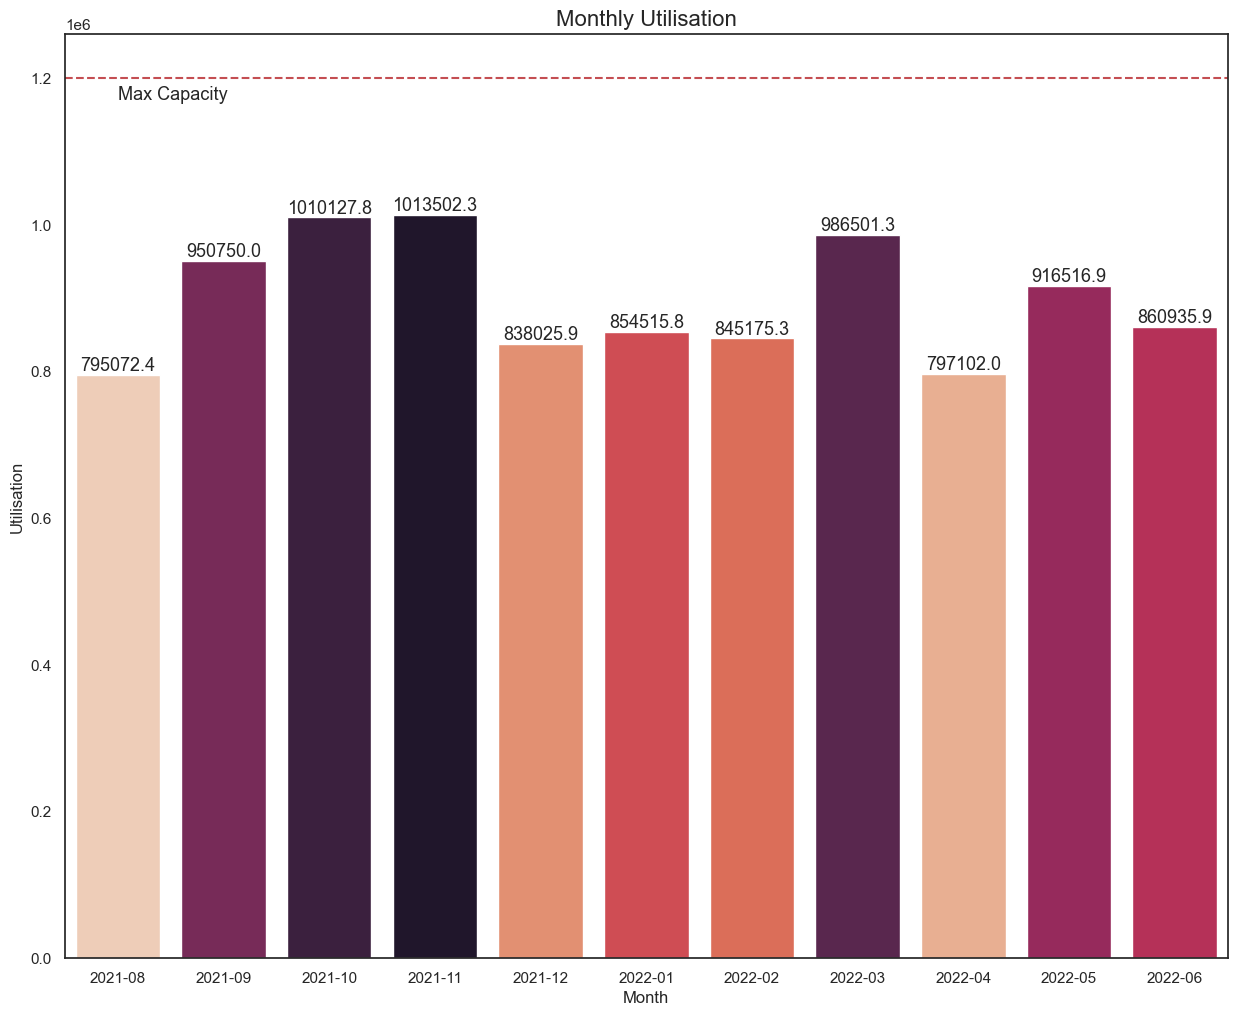

In [73]:
# Barplot with values and shade
labels = ar_app['utilisation'].tolist()  # Labels on bars
pal = sns.color_palette("rocket", len(ar_app)) # Palette for shaded bars
rank = ar_app['utilisation'].argsort().argsort()
chart = sns.barplot(data=ar_app,y=ar_app['utilisation'], x=ar_app['appointment_month'], palette=np.array(pal[::-1])[rank])
plt.title("Monthly Utilisation",fontsize=16)
plt.xlabel("Month")
plt.ylabel("Utilisation")
plt.text(0.0001,1170000, "Max Capacity", fontsize=13)
plt.axhline(y=max_capacity, color='r', linestyle='--')
chart.bar_label(chart.containers[0], labels=labels, label_type='edge', size=13)  # Setting the values on the bars

- The visualisation shows that actually the Max Capacity given by the NHS has not been reached in any month included in the dataset.
- The question becomes one of how are the NHS resources been utilised and how to improve upon them.

##### How do the healthcare professional types differ over time?

In [74]:
# Bar plot exploring the different types of helthcare professionals
ar_hcp = ar_ag.groupby(['appointment_month','hcp_type']).sum('count_of_appointments').reset_index()
ar_hcp['appointment_month'] = ar_hcp['appointment_month'].values.astype('str')
print(ar_hcp.dtypes)
ar_hcp

appointment_month        object
hcp_type                 object
count_of_appointments     int64
dtype: object


,appointment_month,hcp_type,count_of_appointments
0,2021-08,GP,12299022
1,2021-08,Other Practice staff,10797821
2,2021-08,Unknown,755328
3,2021-09,GP,14487785
4,2021-09,Other Practice staff,13126731
5,2021-09,Unknown,907985
6,2021-10,GP,14300751
7,2021-10,Other Practice staff,14942504
8,2021-10,Unknown,1060579
9,2021-11,GP,14897749


<function matplotlib.pyplot.show(close=None, block=None)>

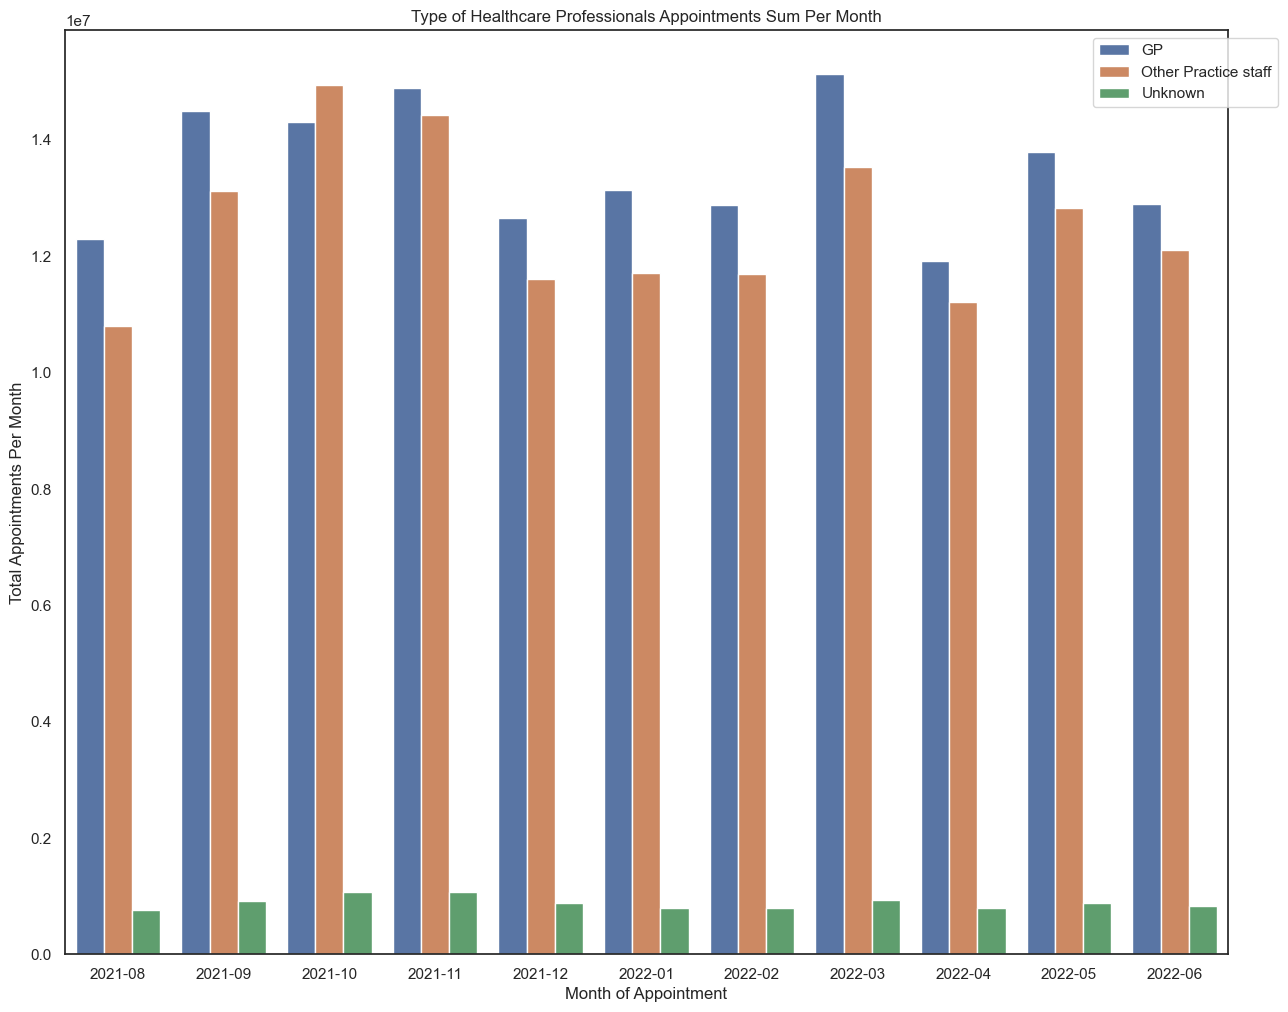

In [75]:
# Barplot
sns.barplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_hcp)
plt.title("Type of Healthcare Professionals Appointments Sum Per Month")
plt.xlabel('Month of Appointment')
plt.ylabel('Total Appointments Per Month')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show

##### Are there changes in terms of appointment type and the busiest months?

In [76]:
# Create a pointplot to answer the question.
ar_mode = ar_ag.groupby(['appointment_month','appointment_mode']).sum('count_of_appointments').reset_index()
ar_mode['appointment_month'] = ar_mode['appointment_month'].values.astype('str')
print(ar_mode.dtypes)
ar_mode

appointment_month        object
appointment_mode         object
count_of_appointments     int64
dtype: object


,appointment_month,appointment_mode,count_of_appointments
0,2021-08,Face-to-Face,13717325
1,2021-08,Home Visit,151619
2,2021-08,Telephone,9149072
3,2021-08,Unknown,724126
4,2021-08,Video/Online,110029
5,2021-09,Face-to-Face,17266602
6,2021-09,Home Visit,171829
7,2021-09,Telephone,10068770
8,2021-09,Unknown,859946
9,2021-09,Video/Online,155354


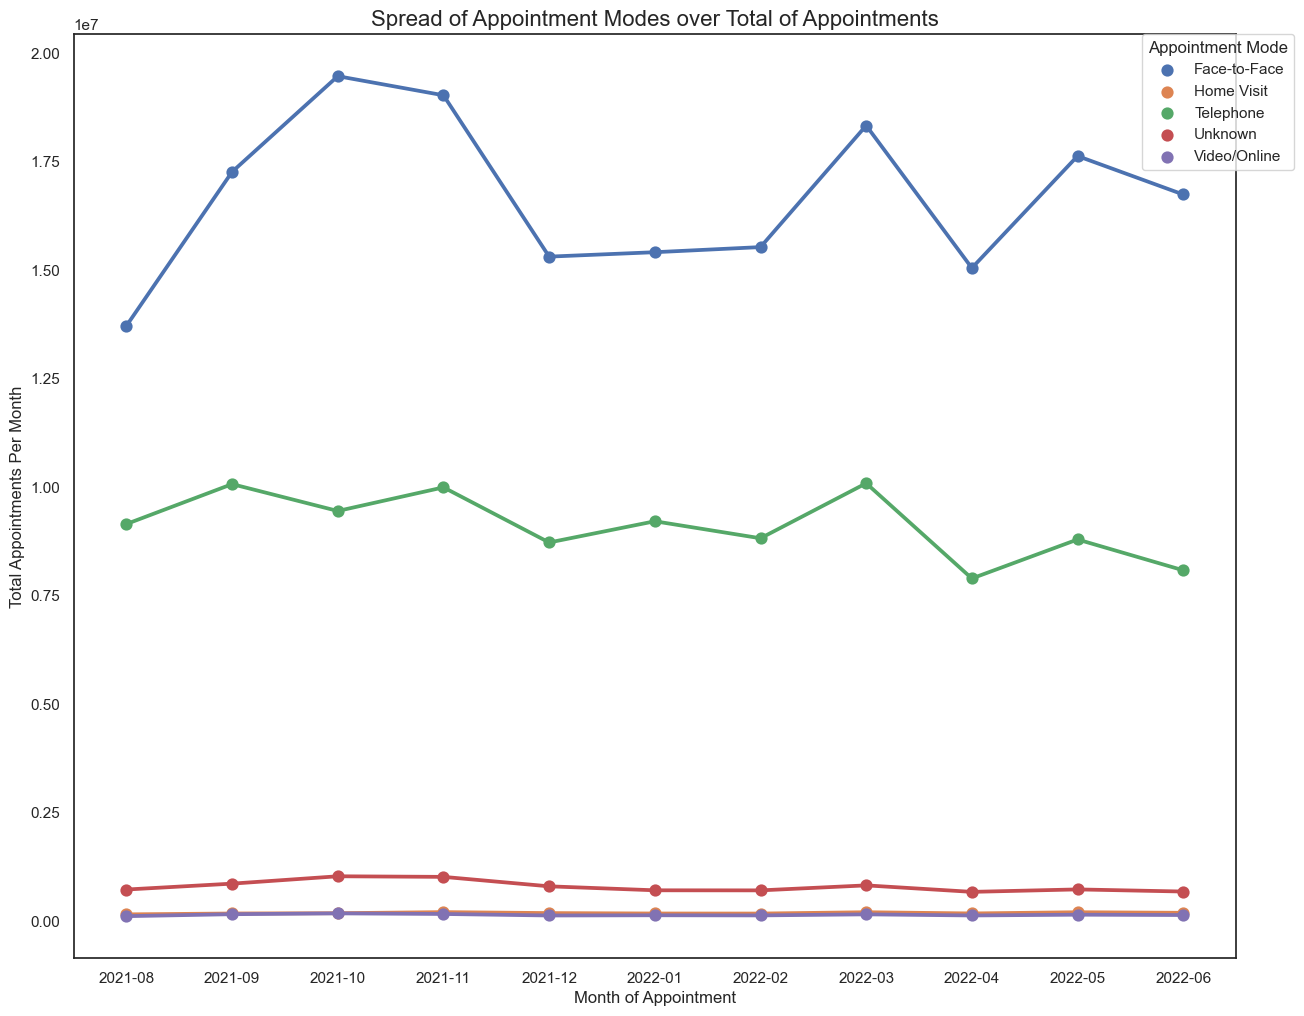

In [77]:
sns.pointplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode',data=ar_mode)
plt.title("Spread of Appointment Modes over Total of Appointments", fontsize=16)
plt.xlabel('Month of Appointment')
plt.ylabel('Total Appointments Per Month')
plt.legend(title="Appointment Mode", bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)

##### Are there any trends in time between booking an appointment?

In [78]:
# Create a lineplot to answer the question.
ar_time = ar_ag[['appointment_month', 'appointment_status', 'time_between_book_and_appointment',
                'count_of_appointments']].\
            groupby(['time_between_book_and_appointment', 'appointment_status', 'appointment_month']).\
            sum().reset_index()
ar_time

,time_between_book_and_appointment,appointment_status,appointment_month,count_of_appointments
0,1 Day,Attended,2021-08,1884017
1,1 Day,Attended,2021-09,2470594
2,1 Day,Attended,2021-10,2388002
3,1 Day,Attended,2021-11,2318276
4,1 Day,Attended,2021-12,2049362
...,...,...,...,...
259,Unknown / Data Quality,Unknown,2022-02,3492
260,Unknown / Data Quality,Unknown,2022-03,4137
261,Unknown / Data Quality,Unknown,2022-04,3018
262,Unknown / Data Quality,Unknown,2022-05,3880


<function matplotlib.pyplot.show(close=None, block=None)>

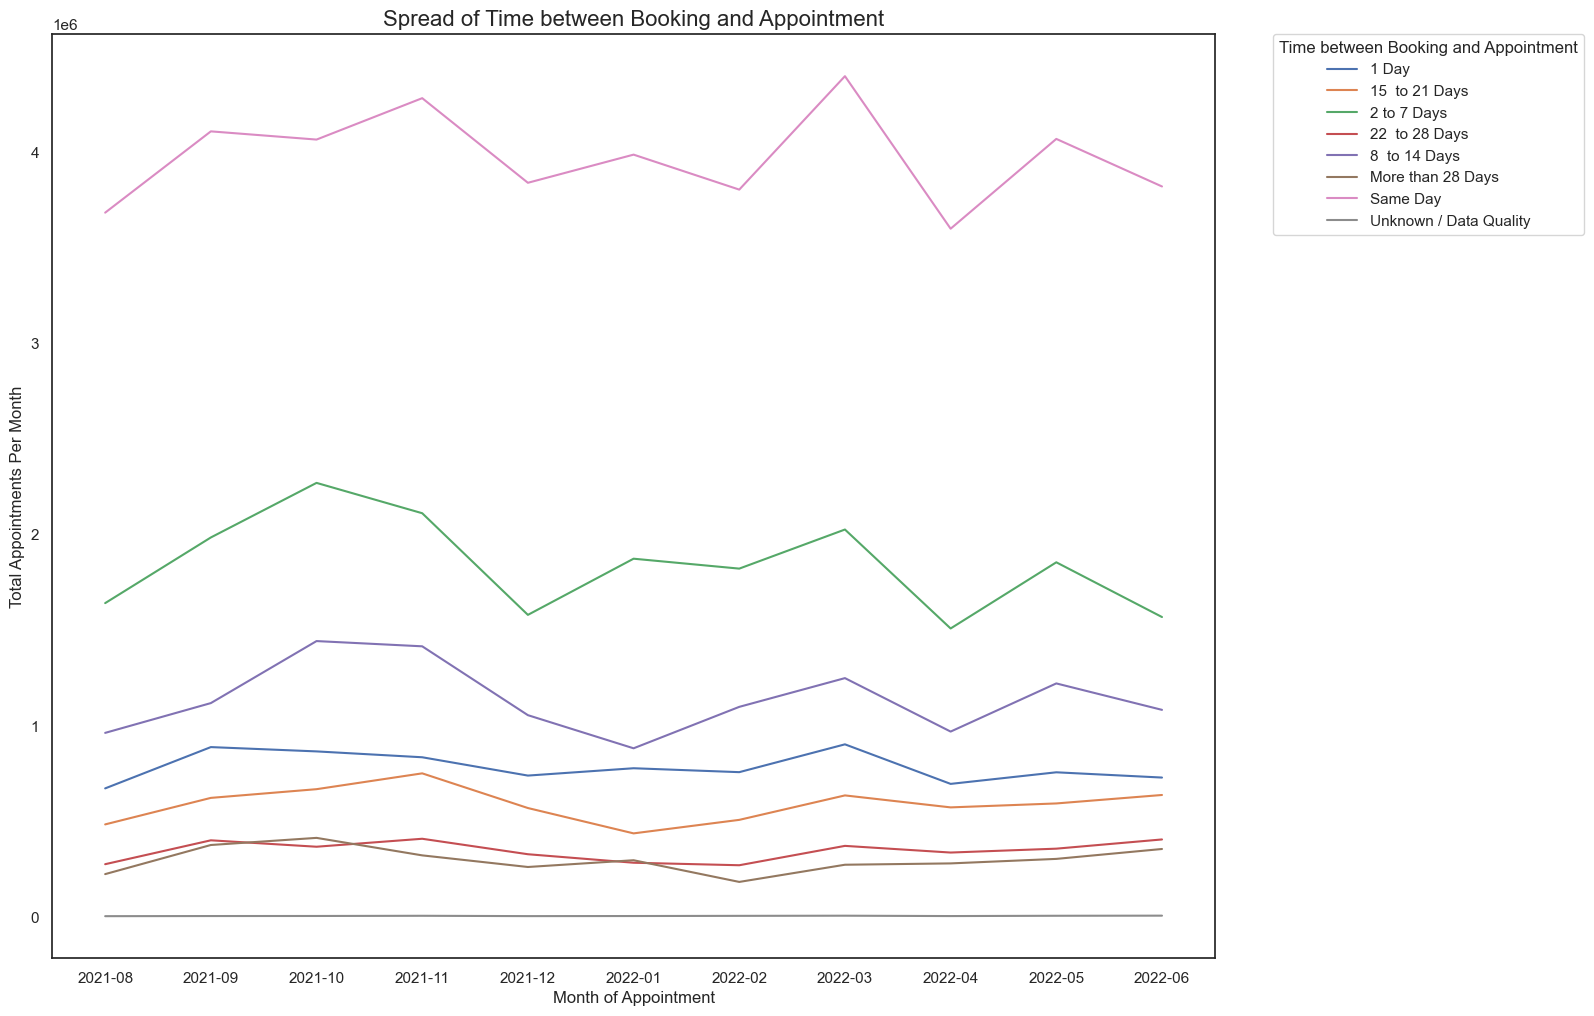

In [79]:
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment',
 data=ar_time, errorbar=None)
plt.title("Spread of Time between Booking and Appointment", fontsize=16)
plt.xlabel('Month of Appointment')
plt.ylabel('Total Appointments Per Month')
plt.legend(title="Time between Booking and Appointment", bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

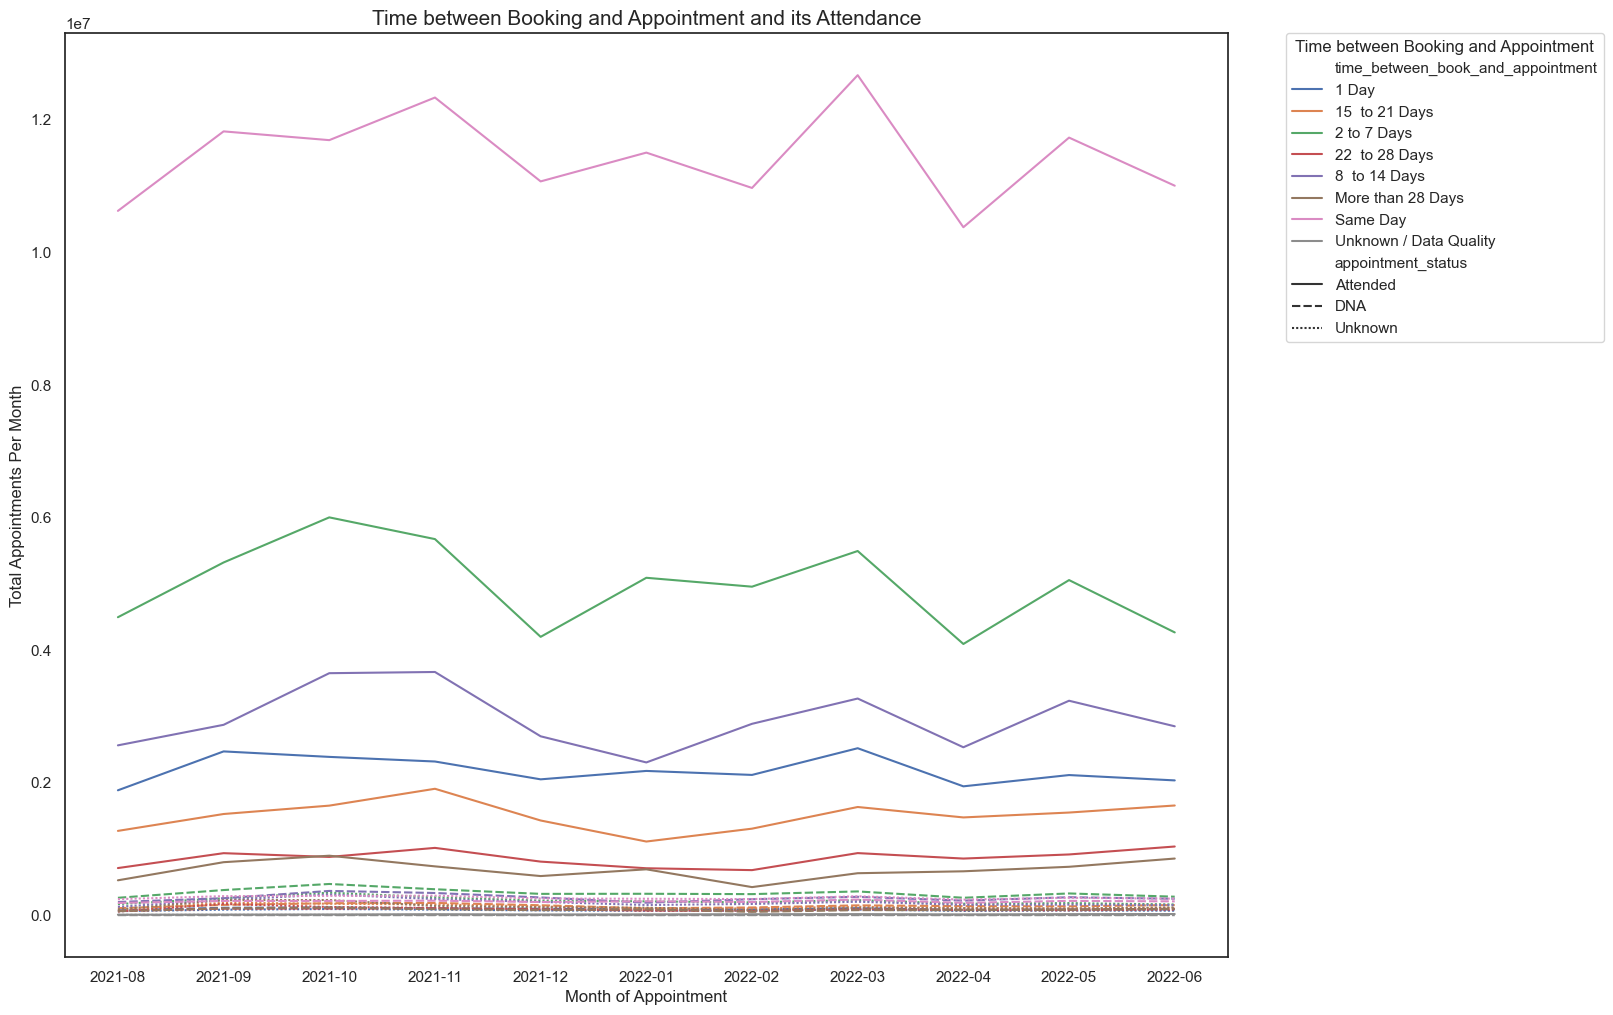

In [80]:
# Correlation between booking time and attendance?
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment',
             style='appointment_status',data=ar_time)
plt.title("Time between Booking and Appointment and its Attendance", fontsize=15)
plt.xlabel('Month of Appointment')
plt.ylabel('Total Appointments Per Month')
plt.legend(title="Time between Booking and Appointment", bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show

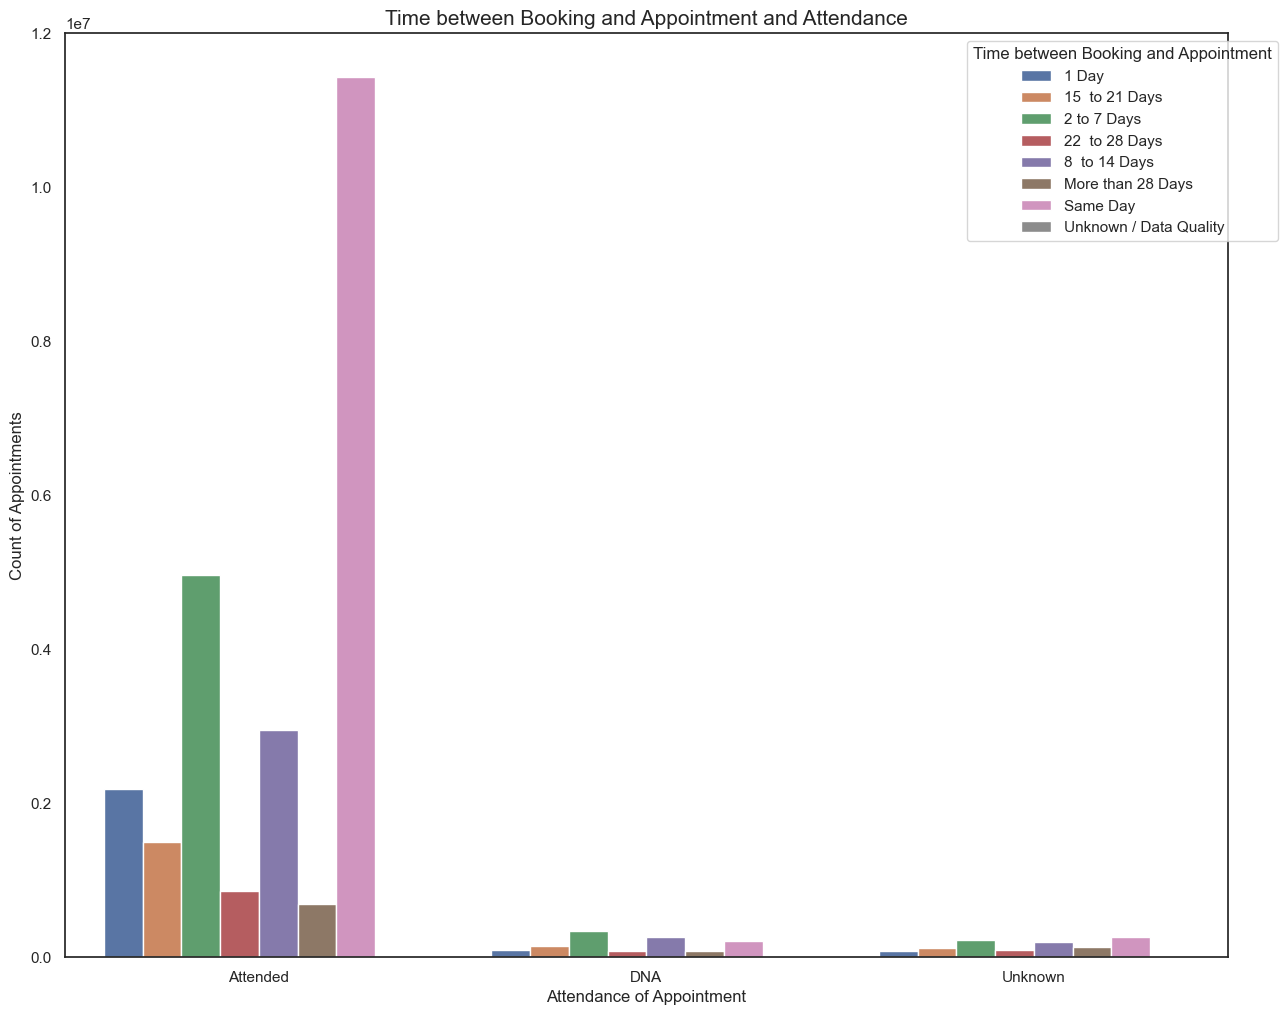

In [81]:
# Barplot
sns.barplot(x='appointment_status', y='count_of_appointments', hue='time_between_book_and_appointment', 
            data=ar_time, errorbar=None)
plt.title("Time between Booking and Appointment and Attendance", fontsize=15)
plt.xlabel("Attendance of Appointment")
plt.ylabel("Count of Appointments")
plt.legend(title="Time between Booking and Appointment", bbox_to_anchor=(1.05, 1), loc='best')

The bar charts shows correlation between the length of time between booking and appointment and the appointment status. On the day appointments are the most frequent ones but not the most missed, while '2 to 7 days' category shows the highest values of missed appointments.

##### How does the spread of service settings compare?

In [82]:
# Let's go back to the national category.
nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [83]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_sub = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['service_setting','appointment_month','count_of_appointments']]\
   .groupby(['service_setting','appointment_month'])\
   .sum()\
   .reset_index ()
# View DataFrame
nc_sub

,service_setting,appointment_month,count_of_appointments
0,Extended Access Provision,2021-08,160927
1,Extended Access Provision,2021-09,187906
2,Extended Access Provision,2021-10,209539
3,Extended Access Provision,2021-11,207577
4,Extended Access Provision,2021-12,173504
5,Extended Access Provision,2022-01,186375
6,Extended Access Provision,2022-02,196627
7,Extended Access Provision,2022-03,231905
8,Extended Access Provision,2022-04,192284
9,Extended Access Provision,2022-05,220511


<function matplotlib.pyplot.show(close=None, block=None)>

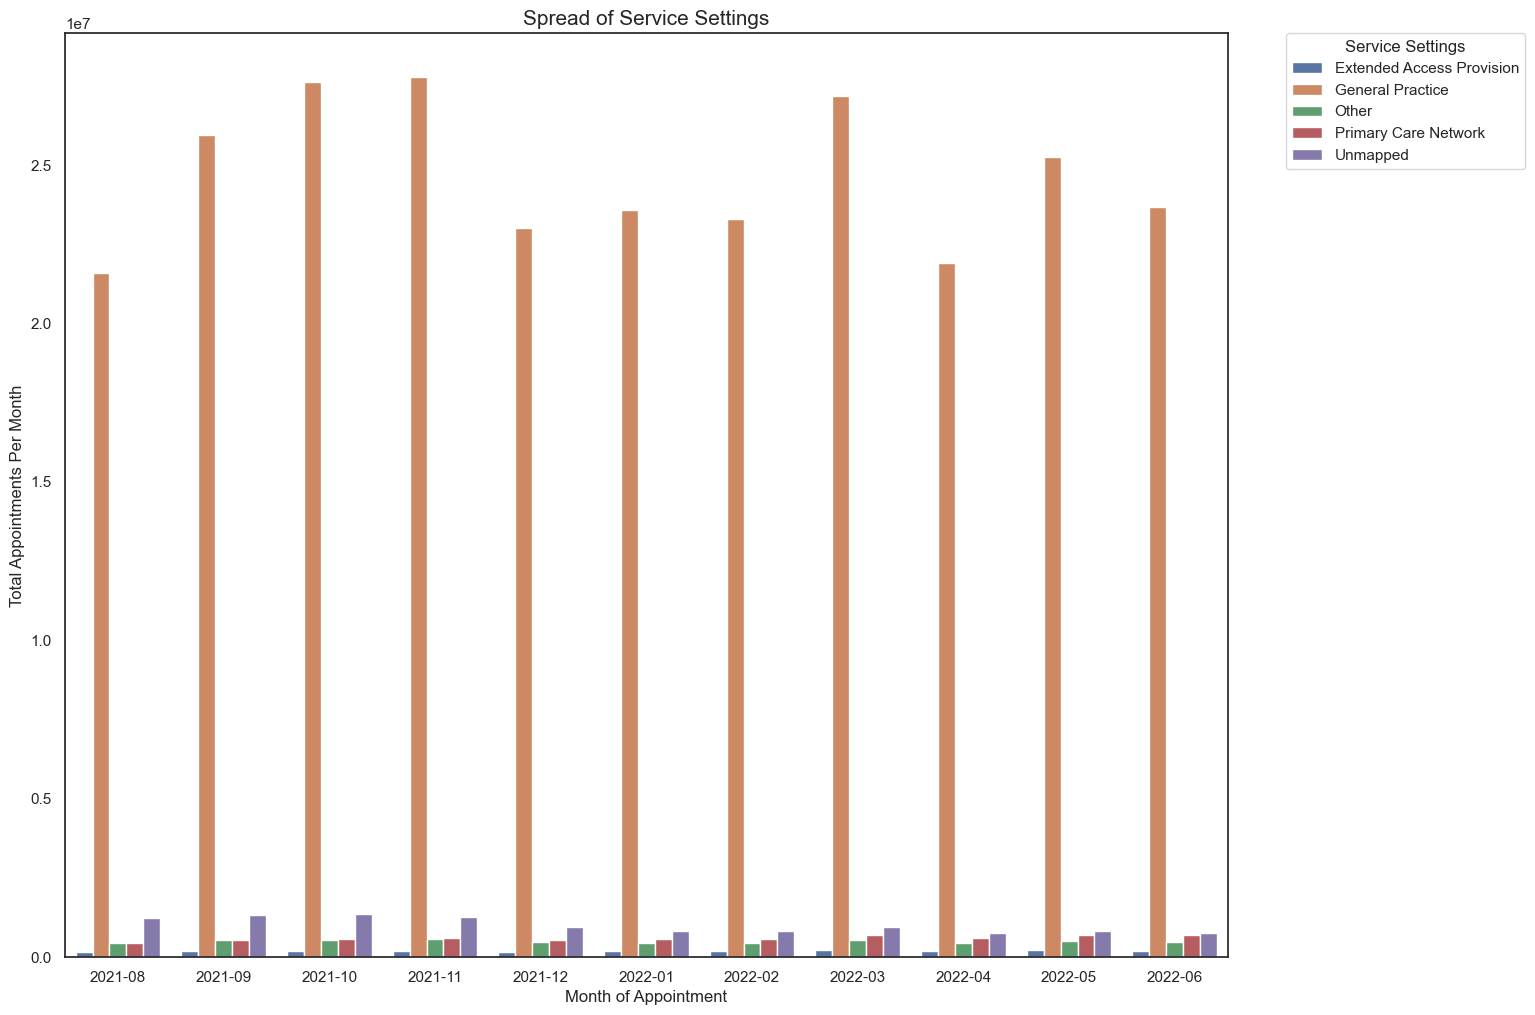

In [84]:
# Create a boxplot to investigate the spread of service settings.
sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting',
            data=nc_sub)
plt.title("Spread of Service Settings", fontsize=15)
plt.xlabel('Month of Appointment')
plt.ylabel('Total Appointments Per Month')
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

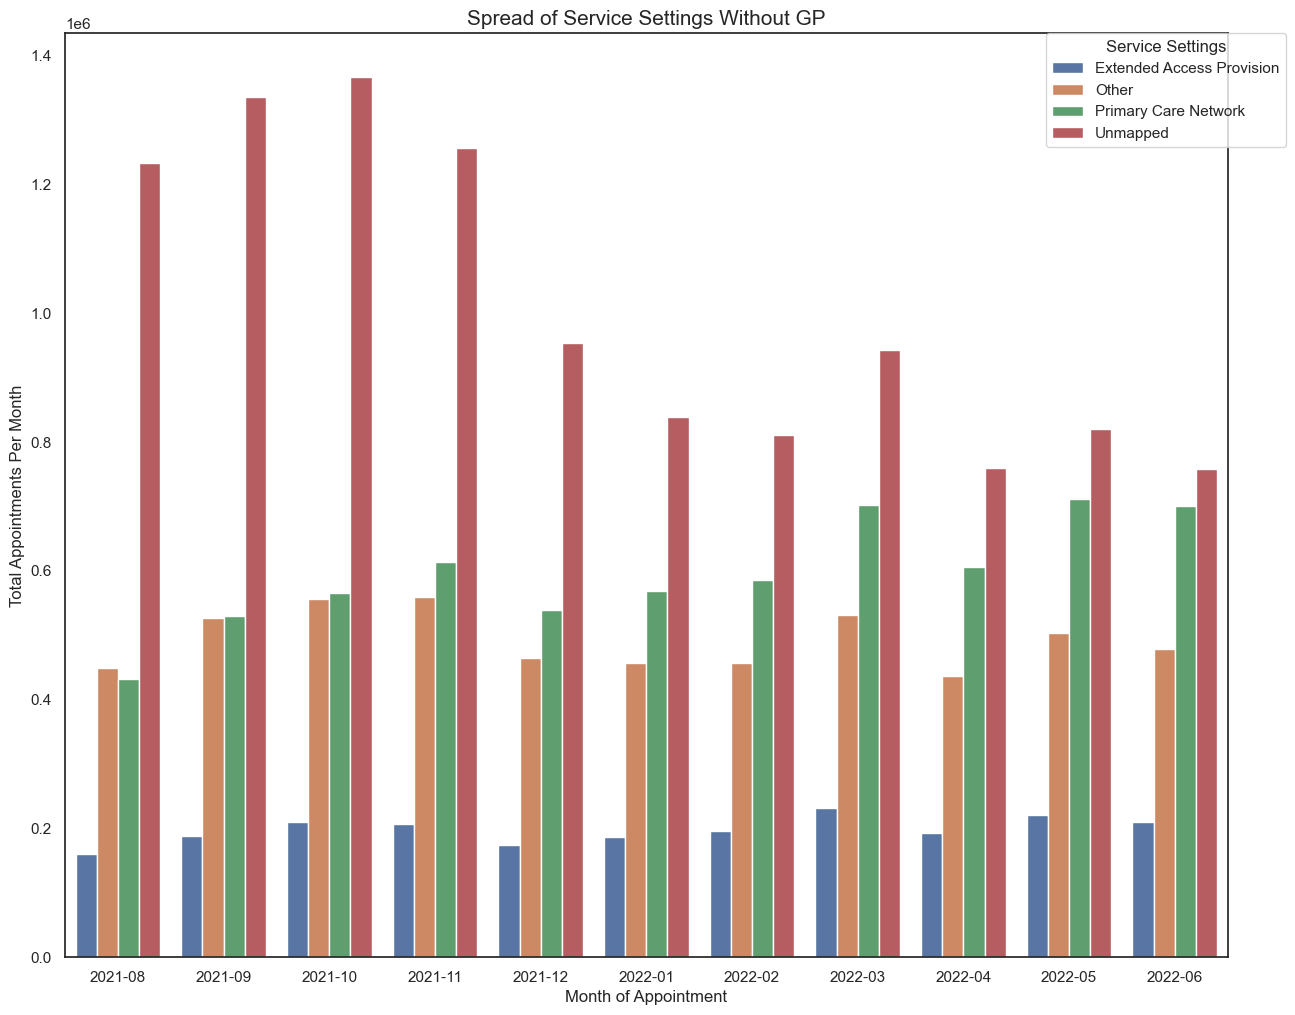

In [85]:
# Create a boxplot to investigate the service settings without GP.
sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting',
            data=nc_sub[nc_sub.service_setting != 'General Practice'])
plt.title("Spread of Service Settings Without GP", fontsize=15)
plt.xlabel('Month of Appointment')
plt.ylabel('Total Appointments Per Month')
plt.legend(title="Service Settings", bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show

The last two plots showed how relevant the 'Unmapped' category is and how it hinders the quality of the dataset.

### Findings Summary:
Overall, the NHS capacity is enough to cover the network but better support to GP practices can be given:<br>
•	‘Telephone’ appointments can support the GP during busy periods.<br>
•	‘Other practice staff’ can support the GP during busy periods.<br>
•	Scheduling in the later days of the week can spread the appointments more evenly.<br>
•	Reducing the time between booking and appointments can help reduce the number of missed appointments and make the network more efficient.
